In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import map_runtime
import itertools

In [2]:
with open("i_result.p","rb") as file:
    result_dict=pickle.load(file)

In [4]:
#reorder the data
ADHOC_memory_per_nan=np.zeros((5,5,5,2))
ADHOC_runtime_per_nan=np.zeros((5,5,5,2))
ADHOC_memory_per_dim=np.zeros((5,5,5,2))
ADHOC_runtime_per_dim=np.zeros((5,5,5,2))

BOOSTED_memory_per_nan=np.zeros((5,5,5,2))
BOOSTED_runtime_per_nan=np.zeros((5,5,5,2))
BOOSTED_memory_per_dim=np.zeros((5,5,5,2))
BOOSTED_runtime_per_dim=np.zeros((5,5,5,2))

number_of_trees = np.array([1, 5, 10, 20, 50])
number_of_datapoints = np.array([50, 100, 1000, 10000, 100000])
number_of_dimensions = np.array([1, 2, 5, 10, 15])
number_of_nan_percentages = np.array([0, 0.1, 0.2, 0.5, 0.9])

BOOSTED_total_result=np.zeros((5,5,5,5,2))
ADHOC_total_result=np.zeros((5,5,5,5,2))

#ADHOC_radar_result= [["Trees","Datapoints","Dimensions","Nan_percentage","Runtime"]]
ADHOC_radar_result=[]
for key,value in result_dict.items():
    ADHOC_total_result[np.where(number_of_trees==key[0]), np.where(number_of_datapoints==key[1]),
                       np.where(number_of_dimensions==key[2]), np.where(number_of_nan_percentages==key[3])                         
                ] =    np.array((np.mean(value[0][3]), np.std(value[0][3])))
    
    BOOSTED_total_result[np.where(number_of_trees==key[0]),np.where(number_of_datapoints==key[1])
                         ,np.where(number_of_dimensions==key[2]),np.where(number_of_nan_percentages==key[3])
                         
                ] = np.array((np.mean(value[1][3]),np.std(value[1][3])))
    radar_value=[("%dtrees,%ddatapoints,%ddimensions," % key[0:3])+("%dnan_percentage"% (key[3]*100))]
    [radar_value.append(x) for x in key]
    radar_value.append(np.mean(value[0][2]))
    radar_value.append(np.mean(value[0][3]))
    radar_value.append(np.mean(value[1][2]))
    radar_value.append(np.mean(value[1][3]))
    ADHOC_radar_result.append( radar_value)
    
    ADHOC_memory_per_nan[np.where(number_of_trees==key[0]),np.where(number_of_nan_percentages==key[3]),
                         np.where(number_of_datapoints==key[1])]=np.array((np.mean(value[0][3]),np.std(value[0][3])))
    ADHOC_runtime_per_nan[np.where(number_of_trees==key[0]),np.where(number_of_nan_percentages==key[3]),
                     np.where(number_of_datapoints==key[1])]=np.array((np.mean(value[0][2]),np.std(value[0][2])))
    
    ADHOC_memory_per_dim[np.where(number_of_trees==key[0]),np.where(number_of_dimensions==key[2]),
                         np.where(number_of_datapoints==key[1])]=np.array((np.mean(value[0][3]),np.std(value[0][3])))
    ADHOC_runtime_per_dim[np.where(number_of_trees==key[0]),np.where(number_of_dimensions==key[2]),
                     np.where(number_of_datapoints==key[1])]=np.array((np.mean(value[0][2]),np.std(value[0][2])))
    
    
    BOOSTED_memory_per_nan[np.where(number_of_trees==key[0]),np.where(number_of_nan_percentages==key[3]),
                         np.where(number_of_datapoints==key[1])]=np.array((np.mean(value[1][3]),np.std(value[1][3])))
    BOOSTED_runtime_per_nan[np.where(number_of_trees==key[0]),np.where(number_of_nan_percentages==key[3]),
                     np.where(number_of_datapoints==key[1])]=np.array((np.mean(value[1][2]),np.std(value[1][2])))
        
    BOOSTED_memory_per_dim[np.where(number_of_trees==key[0]),np.where(number_of_dimensions==key[2]),
                         np.where(number_of_datapoints==key[1])]=np.array((np.mean(value[1][3]),np.std(value[1][3])))
    BOOSTED_runtime_per_dim[np.where(number_of_trees==key[0]),np.where(number_of_dimensions==key[2]),
                     np.where(number_of_datapoints==key[1])]=np.array((np.mean(value[1][2]),np.std(value[1][2])))
    
    

In [5]:
df=pd.DataFrame(ADHOC_radar_result,columns=["group","Trees","Datapoints","Dimensions",
                                            "NAN-Percentage","ADHOC Runtime","ADHOC Memory",
                                           "BOOSTED Runtime", "BOOSTED Memory"])
df

group  Trees  Datapoints  \
0      1trees,50datapoints,1dimensions,0nan_percentage      1          50   
1     1trees,50datapoints,1dimensions,10nan_percentage      1          50   
2     1trees,50datapoints,1dimensions,20nan_percentage      1          50   
3     1trees,50datapoints,1dimensions,50nan_percentage      1          50   
4     1trees,50datapoints,1dimensions,70nan_percentage      1          50   
5     1trees,50datapoints,1dimensions,90nan_percentage      1          50   
6      1trees,50datapoints,2dimensions,0nan_percentage      1          50   
7     1trees,50datapoints,2dimensions,10nan_percentage      1          50   
8     1trees,50datapoints,2dimensions,20nan_percentage      1          50   
9     1trees,50datapoints,2dimensions,50nan_percentage      1          50   
10    1trees,50datapoints,2dimensions,70nan_percentage      1          50   
11    1trees,50datapoints,2dimensions,90nan_percentage      1          50   
12     1trees,50datapoints,5dimensions,0nan_percentage      1          50   
13    1trees,50datapoints,5dimensions,10nan_percentage      1          50   
14    1trees,50datapoints,5dimensions,20nan_percentage      1          50   
15    1trees,50datapoints,5dimensions,50nan_percentage      1          50   
16    1trees,50datapoints,5dimensions,70nan_percentage      1          50   
17    1trees,50datapoints,5dimensions,90nan_percentage      1          50   
18    1trees,50datapoints,10dimensions,0nan_percentage      1          50   
19   1trees,50datapoints,10dimensions,10nan_percentage      1          50   
20   1trees,50datapoints,10dimensions,20nan_percentage      1          50   
21   1trees,50datapoints,10dimensions,50nan_percentage      1          50   
22   1trees,50datapoints,10dimensions,70nan_percentage      1          50   
23   1trees,50datapoints,10dimensions,90nan_percentage      1          50   
24    1trees,50datapoints,15dimensions,0nan_percentage      1          50   
25   1trees,50datapoints,15dimensions,10nan_percentage      1          50   
26   1trees,50datapoints,15dimensions,20nan_percentage      1          50   
27   1trees,50datapoints,15dimensions,50nan_percentage      1          50   
28   1trees,50datapoints,15dimensions,70nan_percentage      1          50   
29   1trees,50datapoints,15dimensions,90nan_percentage      1          50   
..                                                 ...    ...         ...   
719  50trees,100000datapoints,1dimensions,0nan_perc...     50      100000   
720  50trees,100000datapoints,1dimensions,10nan_per...     50      100000   
721  50trees,100000datapoints,1dimensions,20nan_per...     50      100000   
722  50trees,100000datapoints,1dimensions,50nan_per...     50      100000   
723  50trees,100000datapoints,1dimensions,70nan_per...     50      100000   
724  50trees,100000datapoints,1dimensions,90nan_per...     50      100000   
725  50trees,100000datapoints,2dimensions,0nan_perc...     50      100000   
726  50trees,100000datapoints,2dimensions,10nan_per...     50      100000   
727  50trees,100000datapoints,2dimensions,20nan_per...     50      100000   
728  50trees,100000datapoints,2dimensions,50nan_per...     50      100000   
729  50trees,100000datapoints,2dimensions,70nan_per...     50      100000   
730  50trees,100000datapoints,2dimensions,90nan_per...     50      100000   
731  50trees,100000datapoints,5dimensions,0nan_perc...     50      100000   
732  50trees,100000datapoints,5dimensions,10nan_per...     50      100000   
733  50trees,100000datapoints,5dimensions,20nan_per...     50      100000   
734  50trees,100000datapoints,5dimensions,50nan_per...     50      100000   
735  50trees,100000datapoints,5dimensions,70nan_per...     50      100000   
736  50trees,100000datapoints,5dimensions,90nan_per...     50      100000   
737  50trees,100000datapoints,10dimensions,0nan_per...     50      100000   
738  50trees,100000datapoints,10dimensions,10nan_pe...     50      100000   
739  50trees,100000datapoints,10dimensions,20

In [6]:
from sklearn.preprocessing import MinMaxScaler
df=pd.DataFrame(ADHOC_radar_result,columns=["group","Trees","Datapoints","Dimensions",
                                            "NAN-Percentage","ADHOC Runtime","ADHOC Memory",
                                           "BOOSTED Runtime", "BOOSTED Memory"])

df["Trees"]=MinMaxScaler().fit_transform(df[["Trees"]].values)+0.1
df["Datapoints"]=MinMaxScaler().fit_transform(df[["Datapoints"]].values)+0.1
df["Dimensions"]=MinMaxScaler().fit_transform(df[["Dimensions"]].values)+0.1
df["NAN-Percentage"]=MinMaxScaler().fit_transform(df[["NAN-Percentage"]].values)+0.1
mmrun=MinMaxScaler()
mixedrun=np.append(df[["ADHOC Runtime"]].values,df[["BOOSTED Runtime"]].values)
mixedrun=np.sort(mixedrun)
mixedrun=mixedrun[0:int(len(mixedrun)-0.05*len(mixedrun))]
mmrun.fit(mixedrun.reshape(-1,1))
df["ADHOC Runtime"]=mmrun.transform(df[["ADHOC Runtime"]].values)+0.1
df["BOOSTED Runtime"]=mmrun.transform(df[["BOOSTED Runtime"]].values)+0.1

mmmem=MinMaxScaler()
mixedmem=np.append(df[["ADHOC Memory"]].values,df[["BOOSTED Memory"]].values)
mixedmem=np.sort(mixedmem)
mmmem.fit(mixedmem.reshape(-1,1))
df["ADHOC Memory"]=mmmem.transform(df[["ADHOC Memory"]].values)+0.1
df["BOOSTED Memory"]=mmmem.transform(df[["BOOSTED Memory"]].values)+0.1
df

C:\Users\Julius\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


group  Trees  Datapoints  \
0      1trees,50datapoints,1dimensions,0nan_percentage    0.1         0.1   
1     1trees,50datapoints,1dimensions,10nan_percentage    0.1         0.1   
2     1trees,50datapoints,1dimensions,20nan_percentage    0.1         0.1   
3     1trees,50datapoints,1dimensions,50nan_percentage    0.1         0.1   
4     1trees,50datapoints,1dimensions,70nan_percentage    0.1         0.1   
5     1trees,50datapoints,1dimensions,90nan_percentage    0.1         0.1   
6      1trees,50datapoints,2dimensions,0nan_percentage    0.1         0.1   
7     1trees,50datapoints,2dimensions,10nan_percentage    0.1         0.1   
8     1trees,50datapoints,2dimensions,20nan_percentage    0.1         0.1   
9     1trees,50datapoints,2dimensions,50nan_percentage    0.1         0.1   
10    1trees,50datapoints,2dimensions,70nan_percentage    0.1         0.1   
11    1trees,50datapoints,2dimensions,90nan_percentage    0.1         0.1   
12     1trees,50datapoints,5dimensions,0nan_percentage    0.1         0.1   
13    1trees,50datapoints,5dimensions,10nan_percentage    0.1         0.1   
14    1trees,50datapoints,5dimensions,20nan_percentage    0.1         0.1   
15    1trees,50datapoints,5dimensions,50nan_percentage    0.1         0.1   
16    1trees,50datapoints,5dimensions,70nan_percentage    0.1         0.1   
17    1trees,50datapoints,5dimensions,90nan_percentage    0.1         0.1   
18    1trees,50datapoints,10dimensions,0nan_percentage    0.1         0.1   
19   1trees,50datapoints,10dimensions,10nan_percentage    0.1         0.1   
20   1trees,50datapoints,10dimensions,20nan_percentage    0.1         0.1   
21   1trees,50datapoints,10dimensions,50nan_percentage    0.1         0.1   
22   1trees,50datapoints,10dimensions,70nan_percentage    0.1         0.1   
23   1trees,50datapoints,10dimensions,90nan_percentage    0.1         0.1   
24    1trees,50datapoints,15dimensions,0nan_percentage    0.1         0.1   
25   1trees,50datapoints,15dimensions,10nan_percentage    0.1         0.1   
26   1trees,50datapoints,15dimensions,20nan_percentage    0.1         0.1   
27   1trees,50datapoints,15dimensions,50nan_percentage    0.1         0.1   
28   1trees,50datapoints,15dimensions,70nan_percentage    0.1         0.1   
29   1trees,50datapoints,15dimensions,90nan_percentage    0.1         0.1   
..                                                 ...    ...         ...   
719  50trees,100000datapoints,1dimensions,0nan_perc...    1.1         1.1   
720  50trees,100000datapoints,1dimensions,10nan_per...    1.1         1.1   
721  50trees,100000datapoints,1dimensions,20nan_per...    1.1         1.1   
722  50trees,100000datapoints,1dimensions,50nan_per...    1.1         1.1   
723  50trees,100000datapoints,1dimensions,70nan_per...    1.1         1.1   
724  50trees,100000datapoints,1dimensions,90nan_per...    1.1         1.1   
725  50trees,100000datapoints,2dimensions,0nan_perc...    1.1         1.1   
726  50trees,100000datapoints,2dimensions,10nan_per...    1.1         1.1   
727  50trees,100000datapoints,2dimensions,20nan_per...    1.1         1.1   
728  50trees,100000datapoints,2dimensions,50nan_per...    1.1         1.1   
729  50trees,100000datapoints,2dimensions,70nan_per...    1.1         1.1   
730  50trees,100000datapoints,2dimensions,90nan_per...    1.1         1.1   
731  50trees,100000datapoints,5dimensions,0nan_perc...    1.1         1.1   
732  50trees,100000datapoints,5dimensions,10nan_per...    1.1         1.1   
733  50trees,100000datapoints,5dimensions,20nan_per...    1.1         1.1   
734  50trees,100000datapoints,5dimensions,50nan_per...    1.1         1.1   
735  50trees,100000datapoints,5dimensions,70nan_per...    1.1         1.1   
736  50trees,100000datapoints,5dimensions,90nan_per...    1.1         1.1   
737  50trees,100000datapoints,10dimensions,0nan_per...    1.1         1.1   
738  50trees,100000datapoints,10dimensions,10nan_pe...    1.1         1.1   
739  50trees,100000datapoints,10dimensions,20

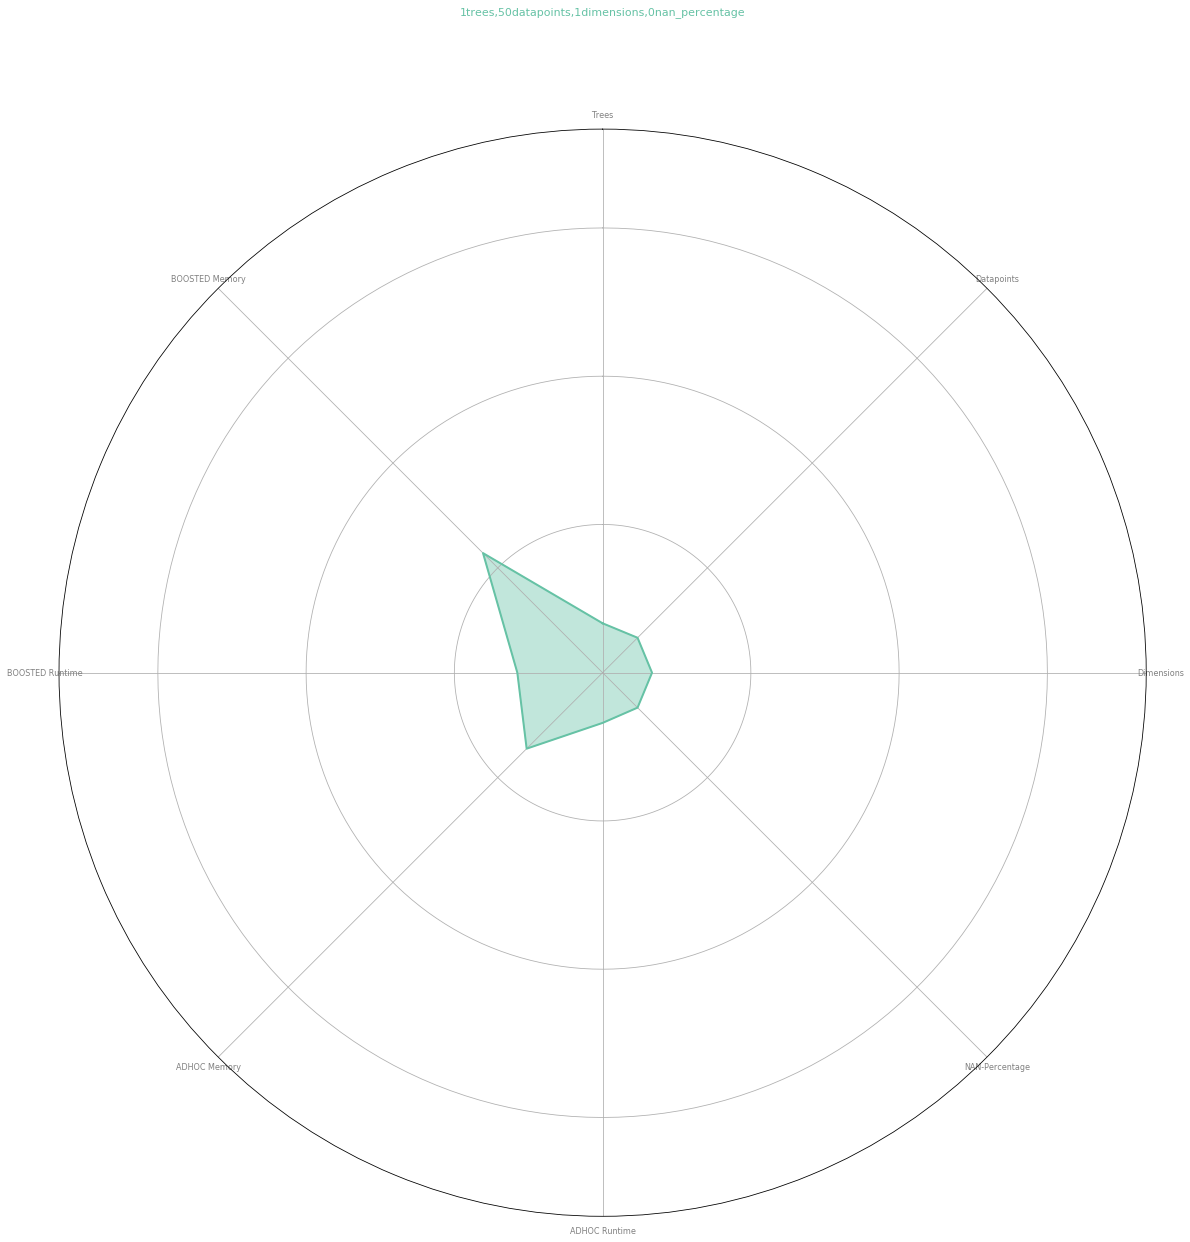

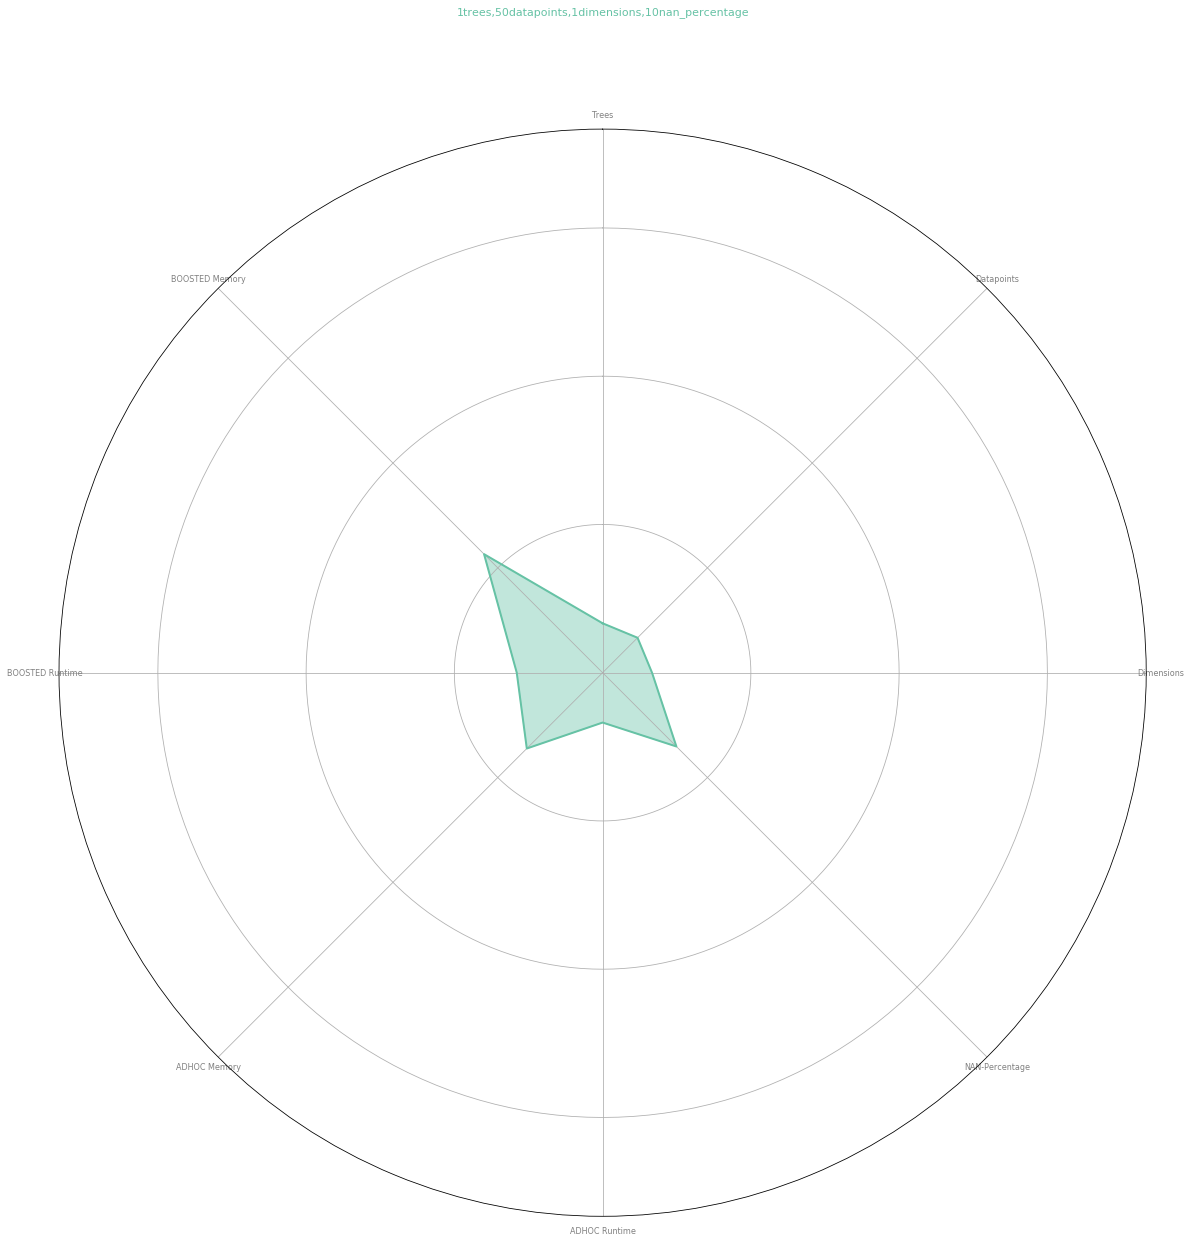

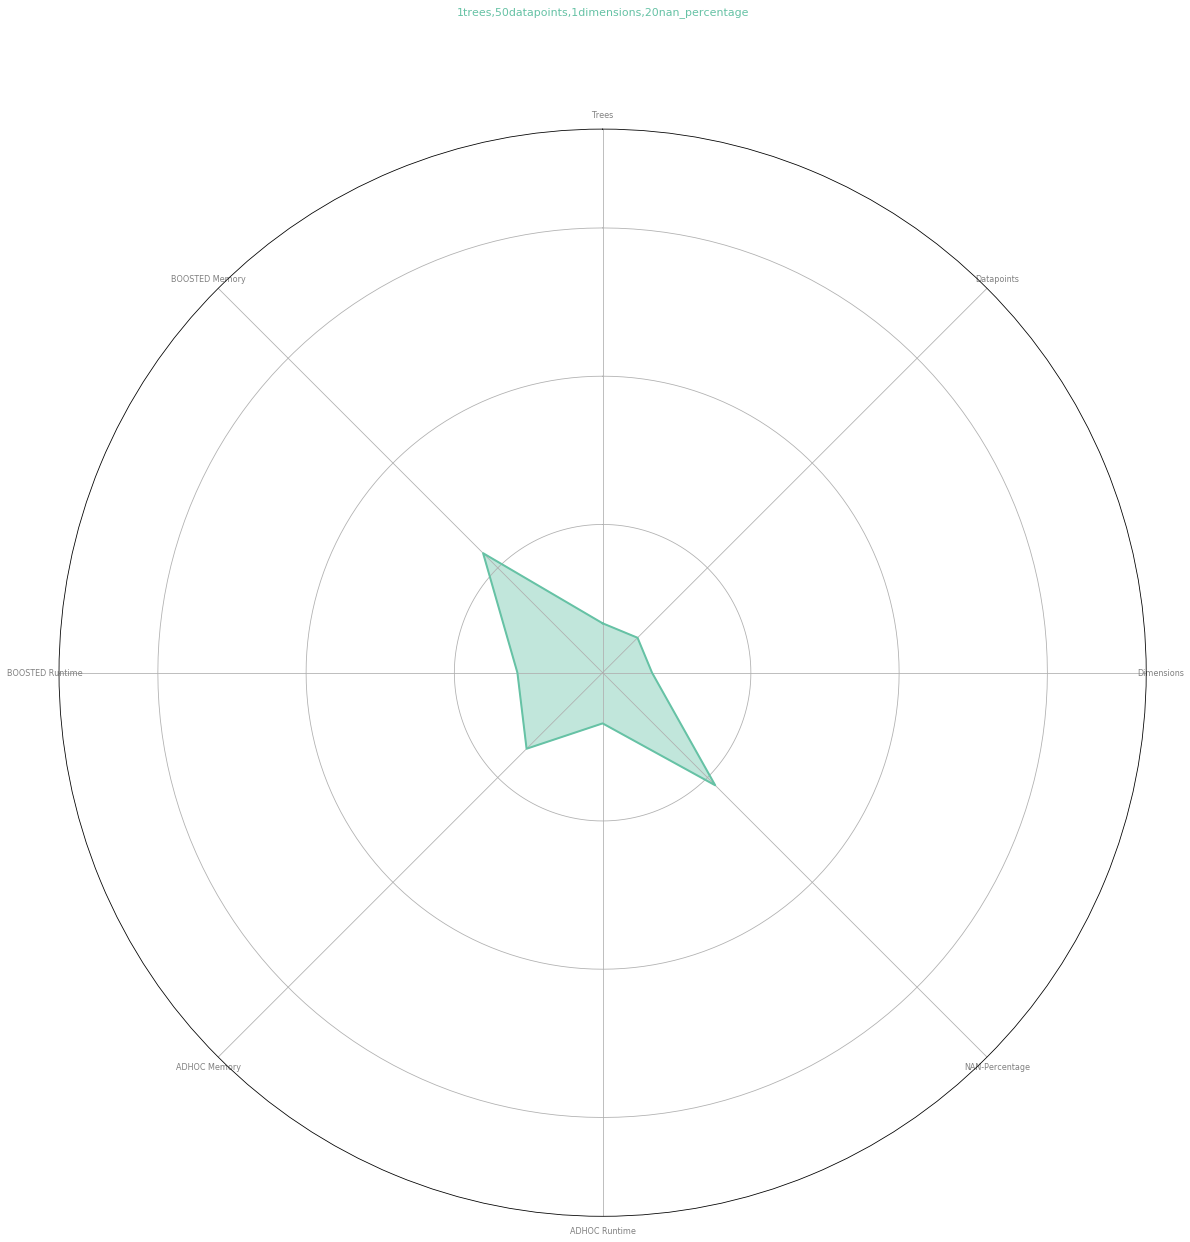

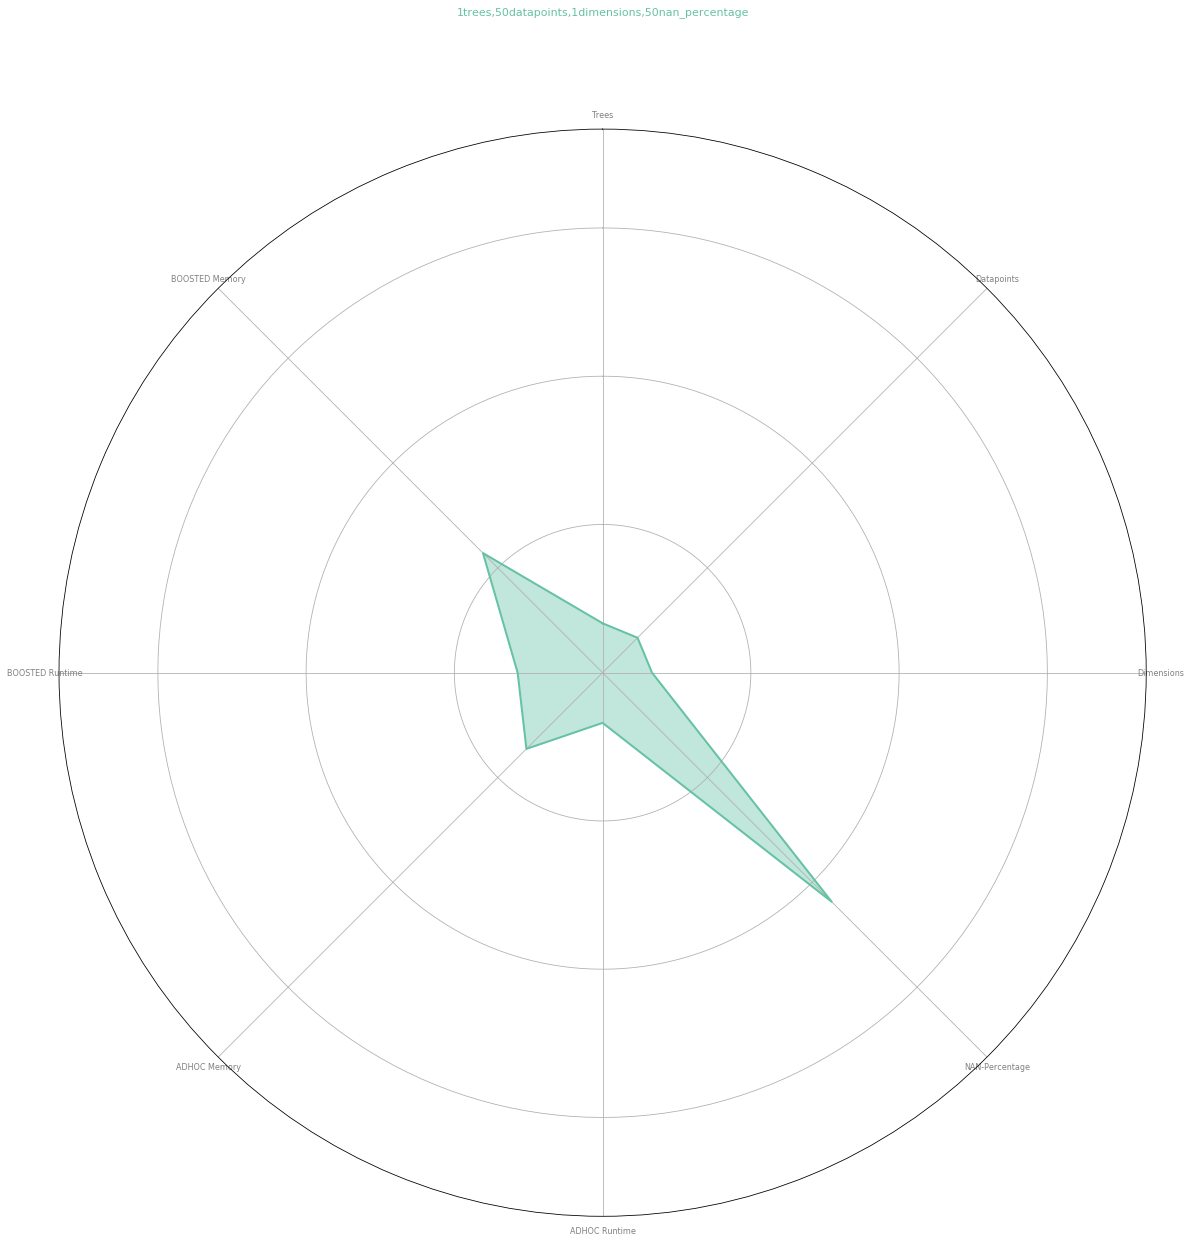

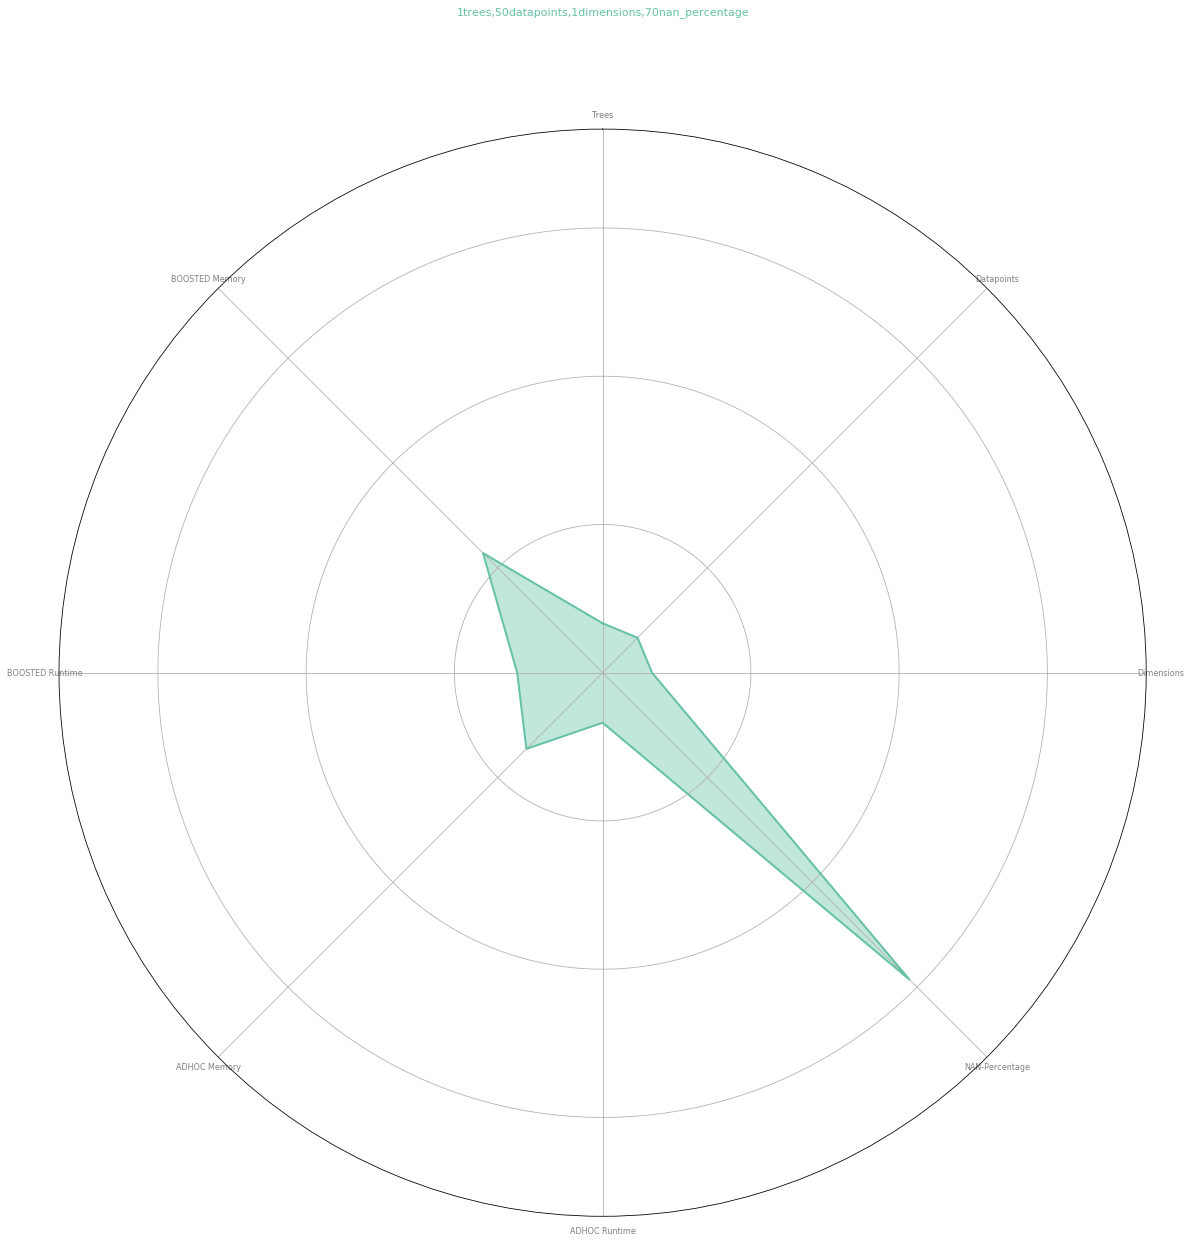

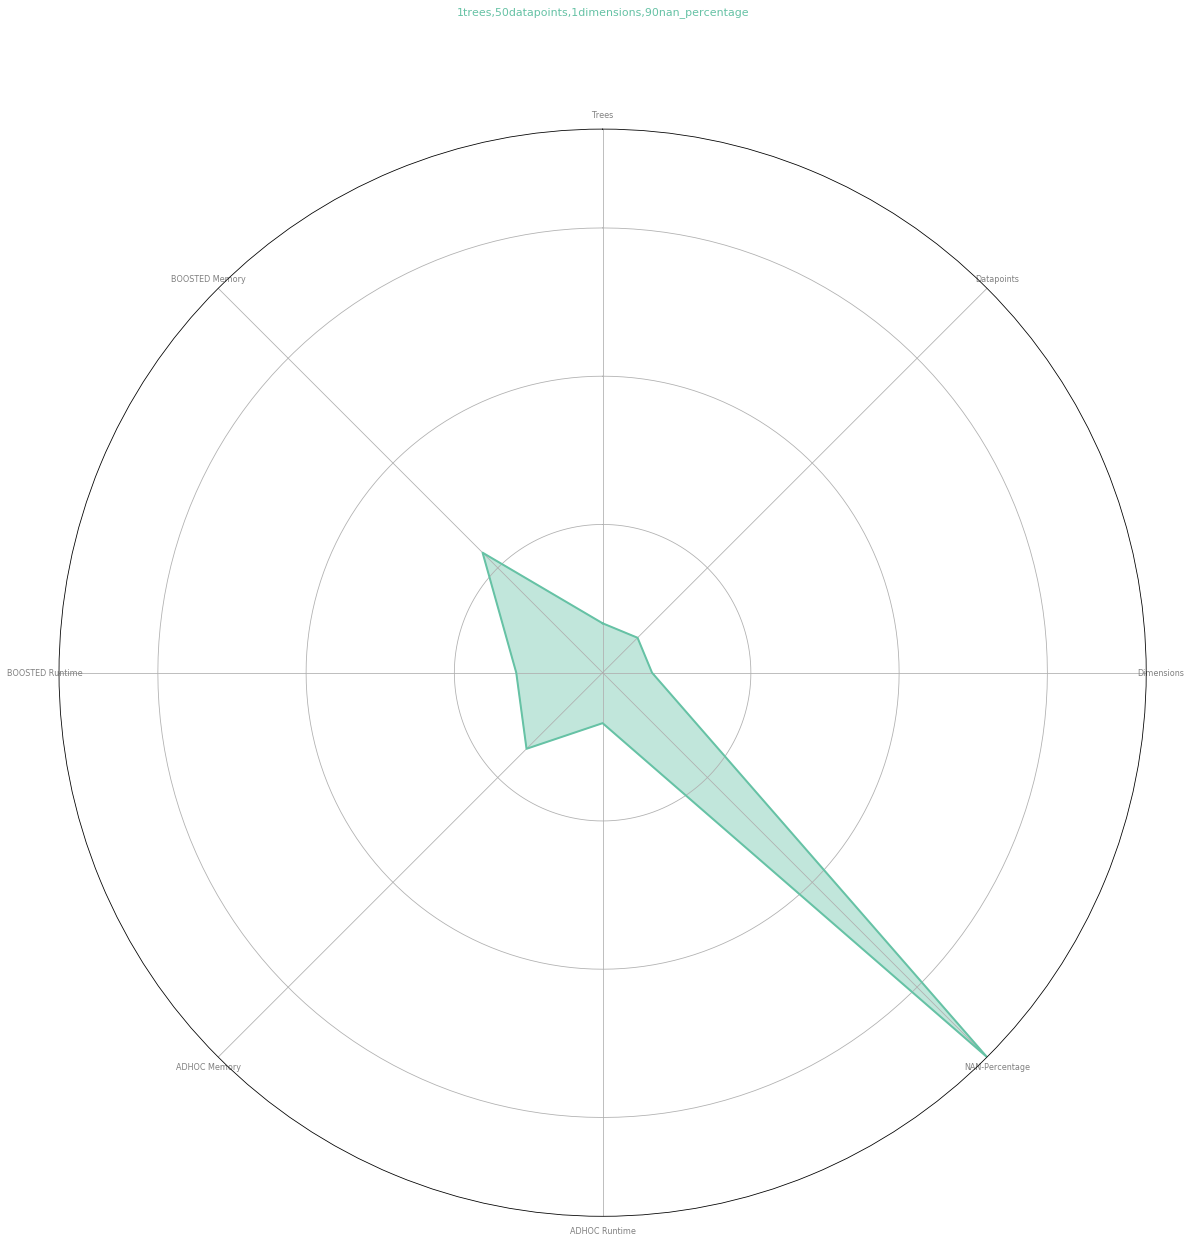

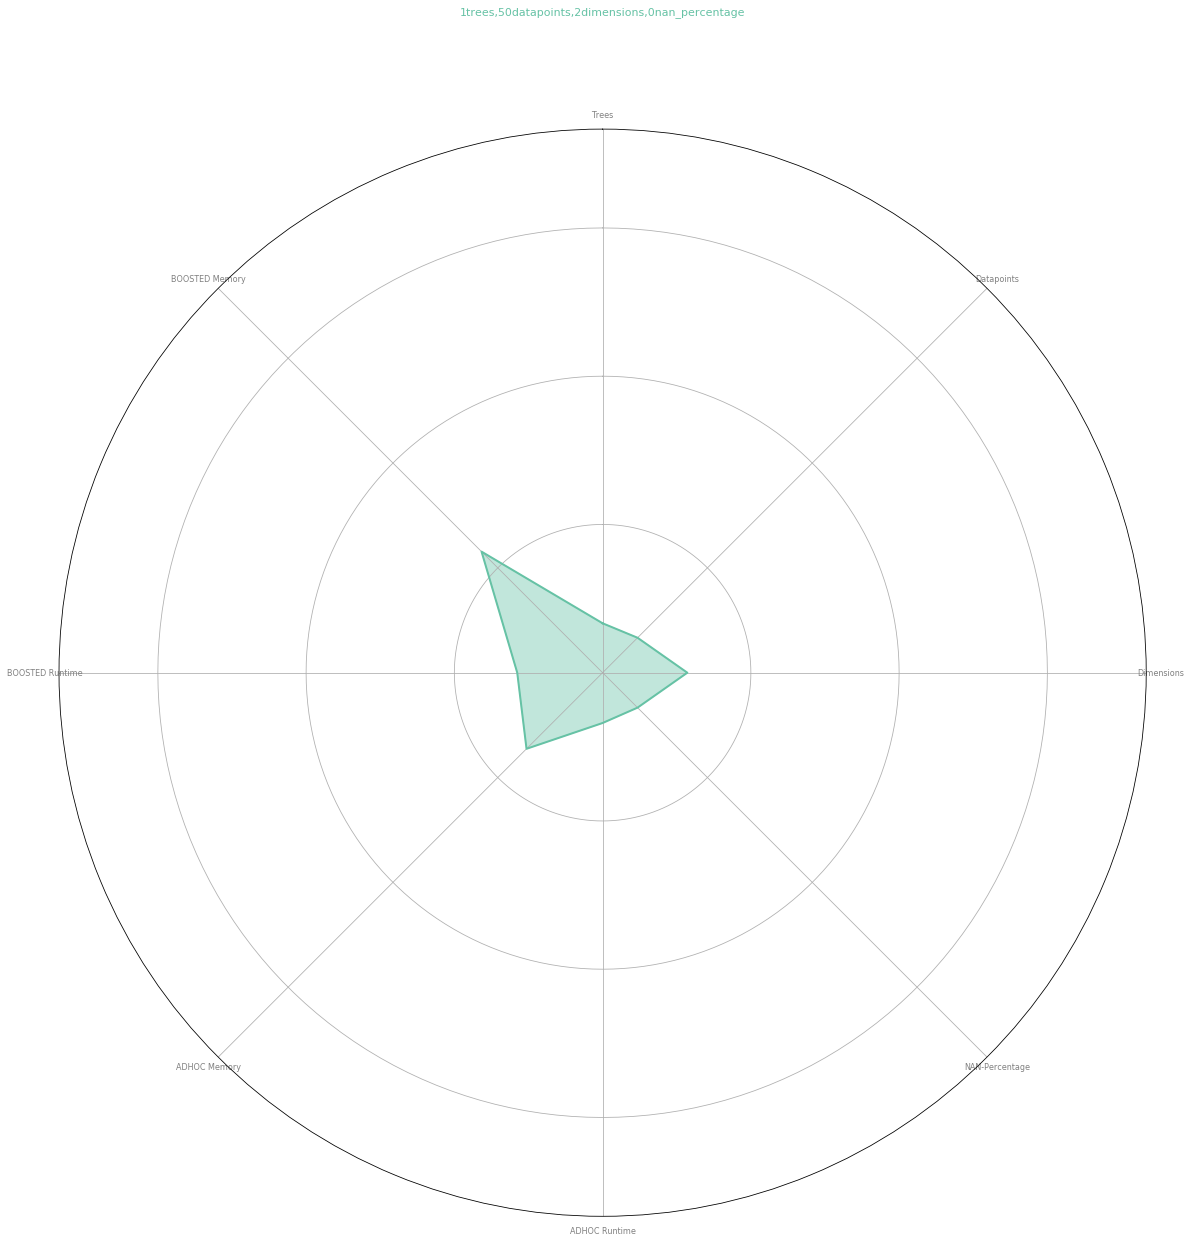

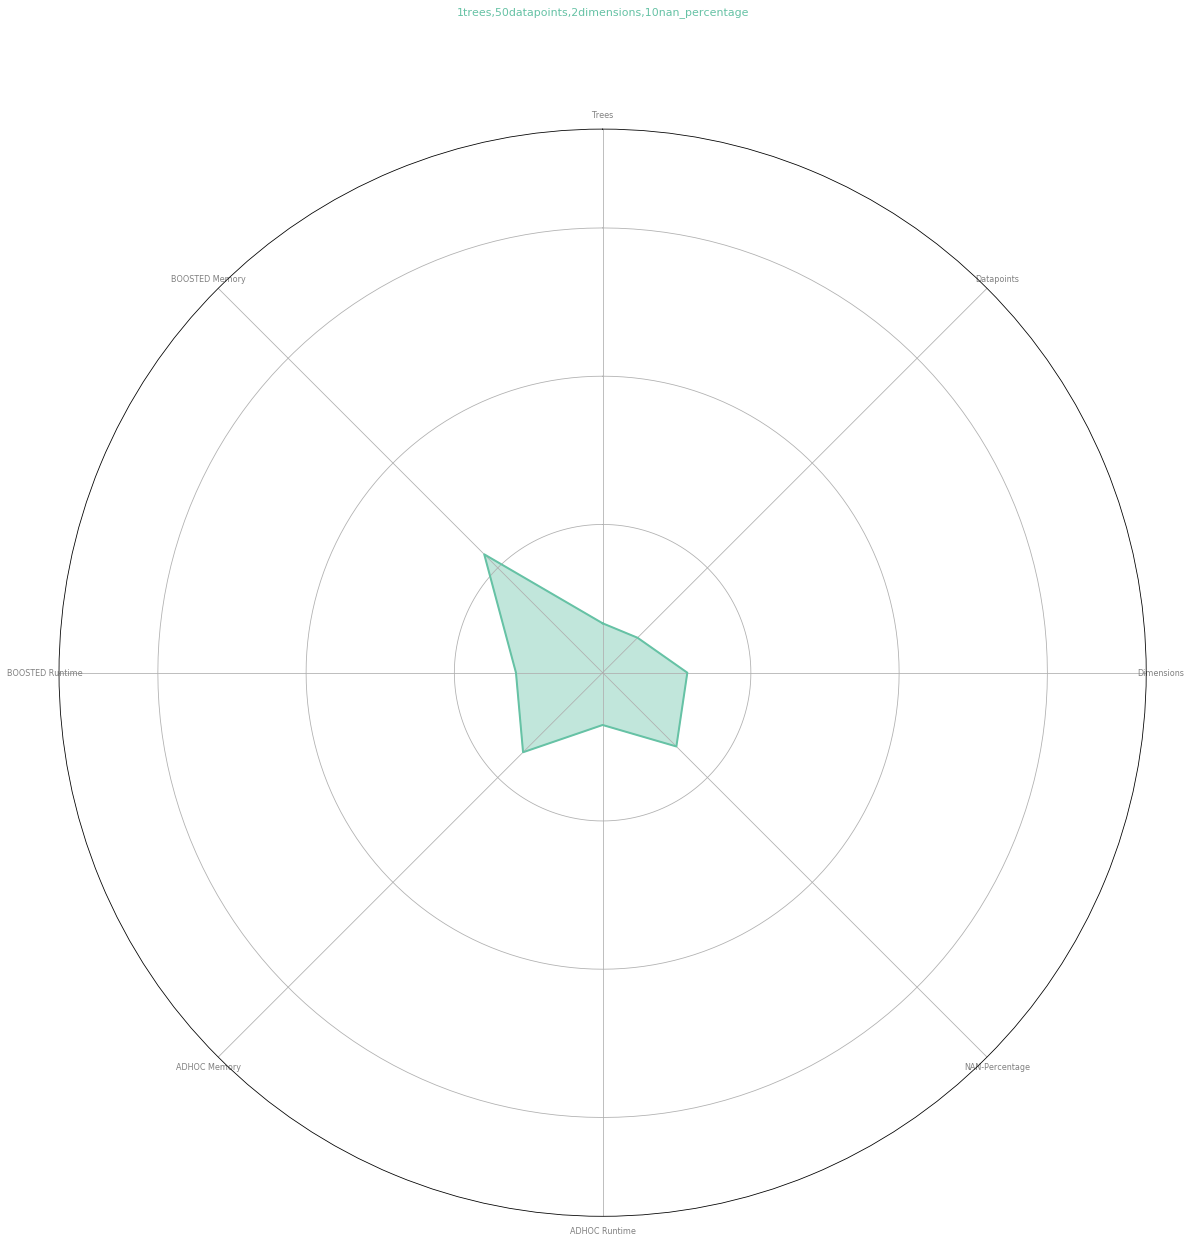

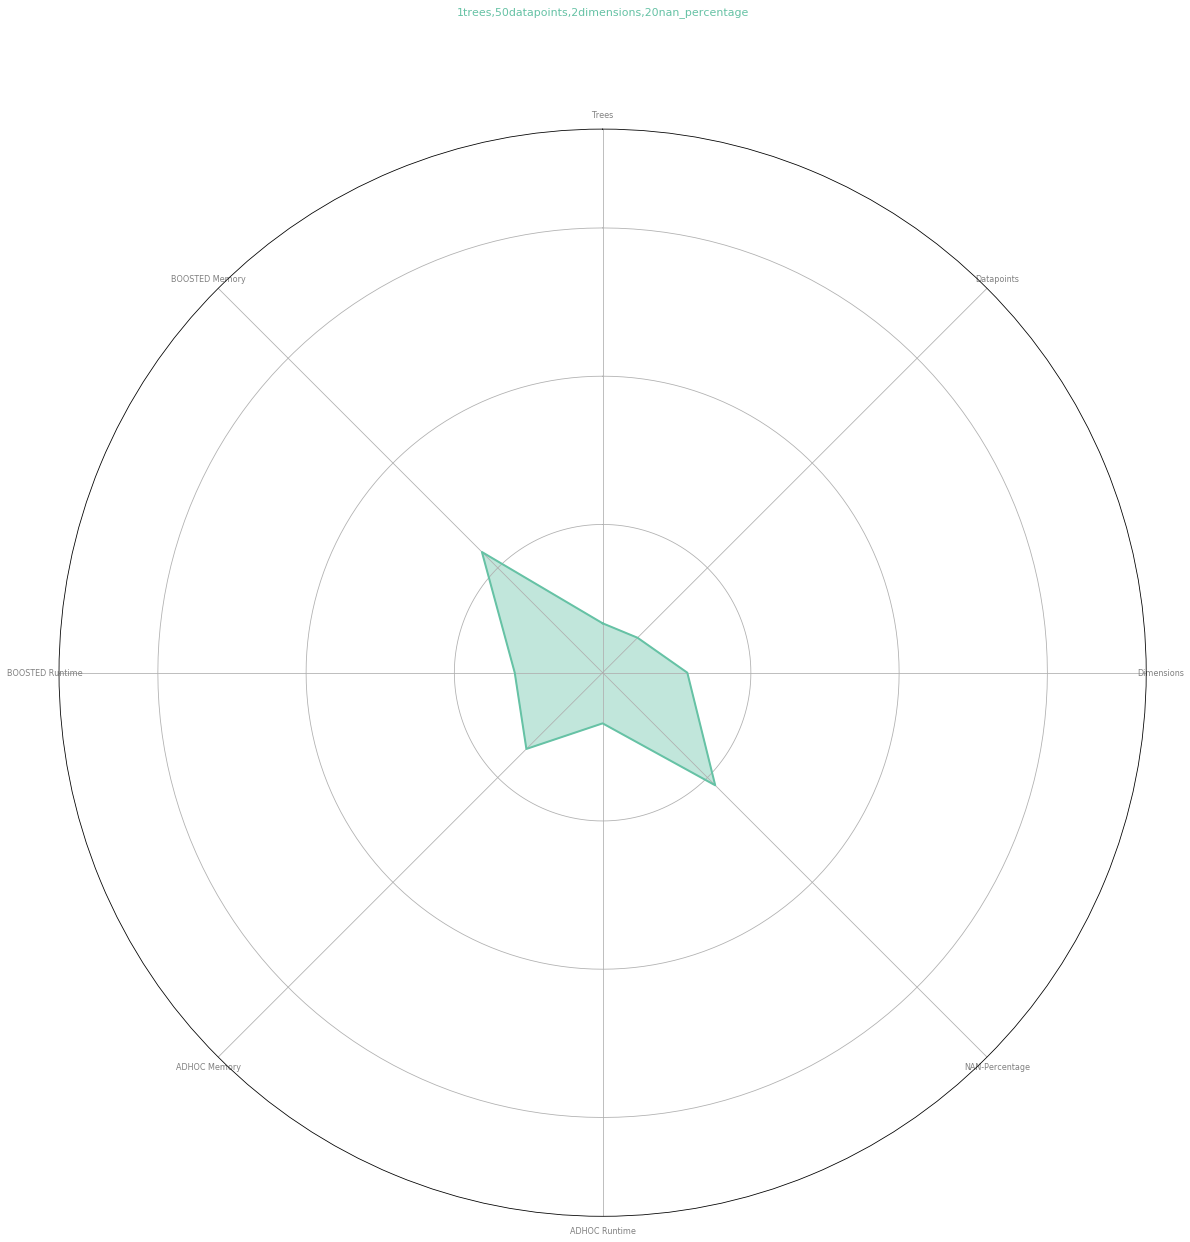

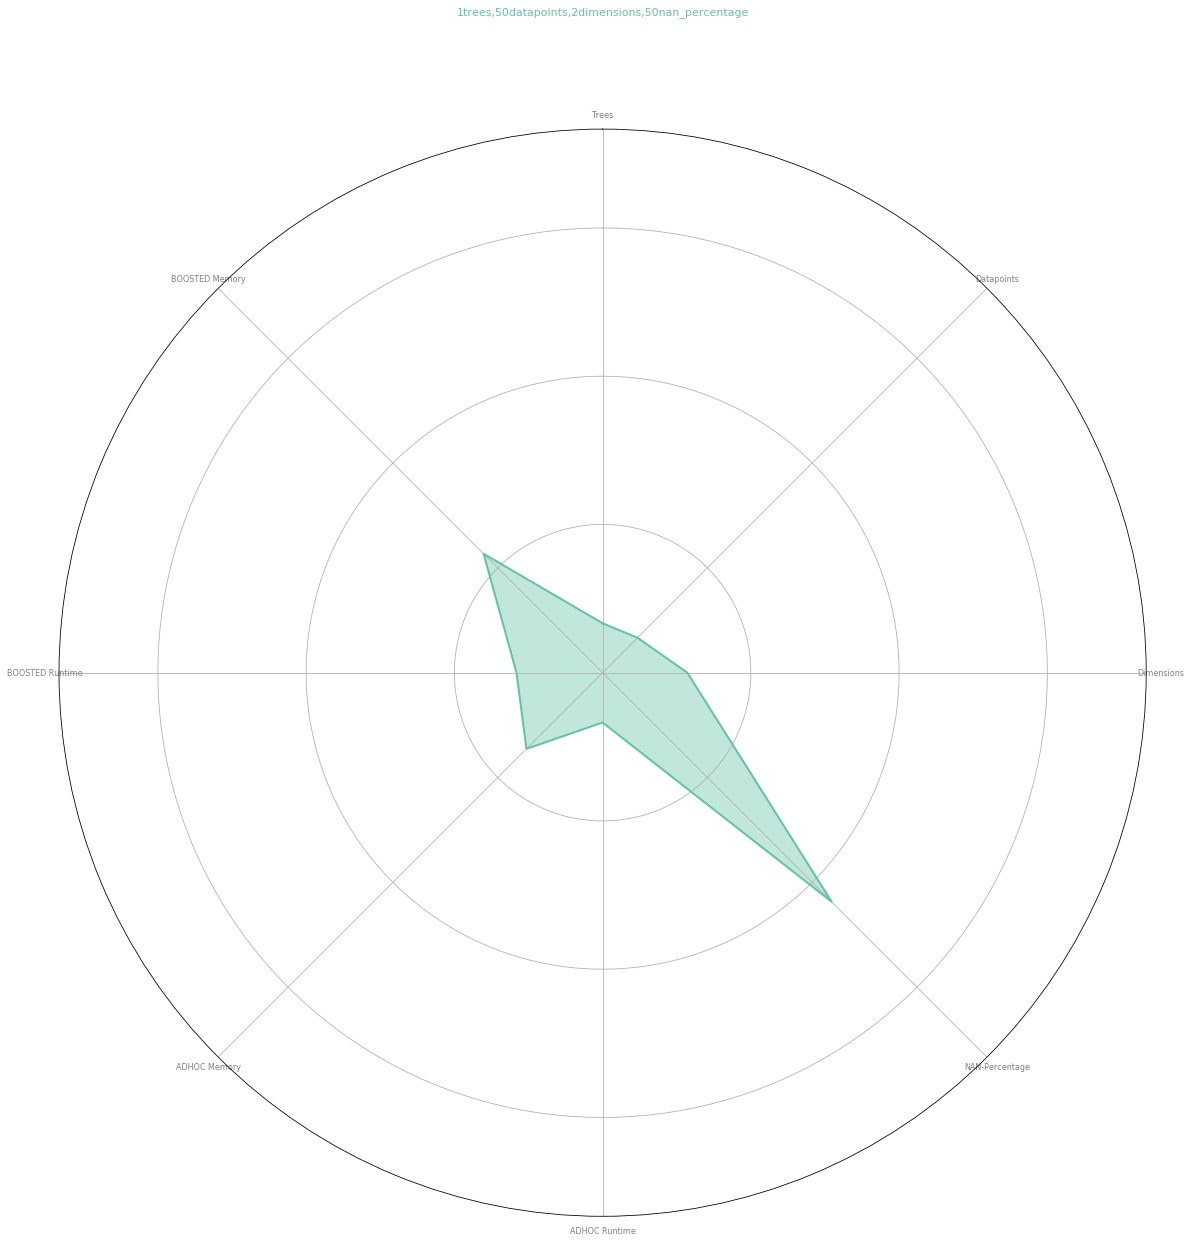

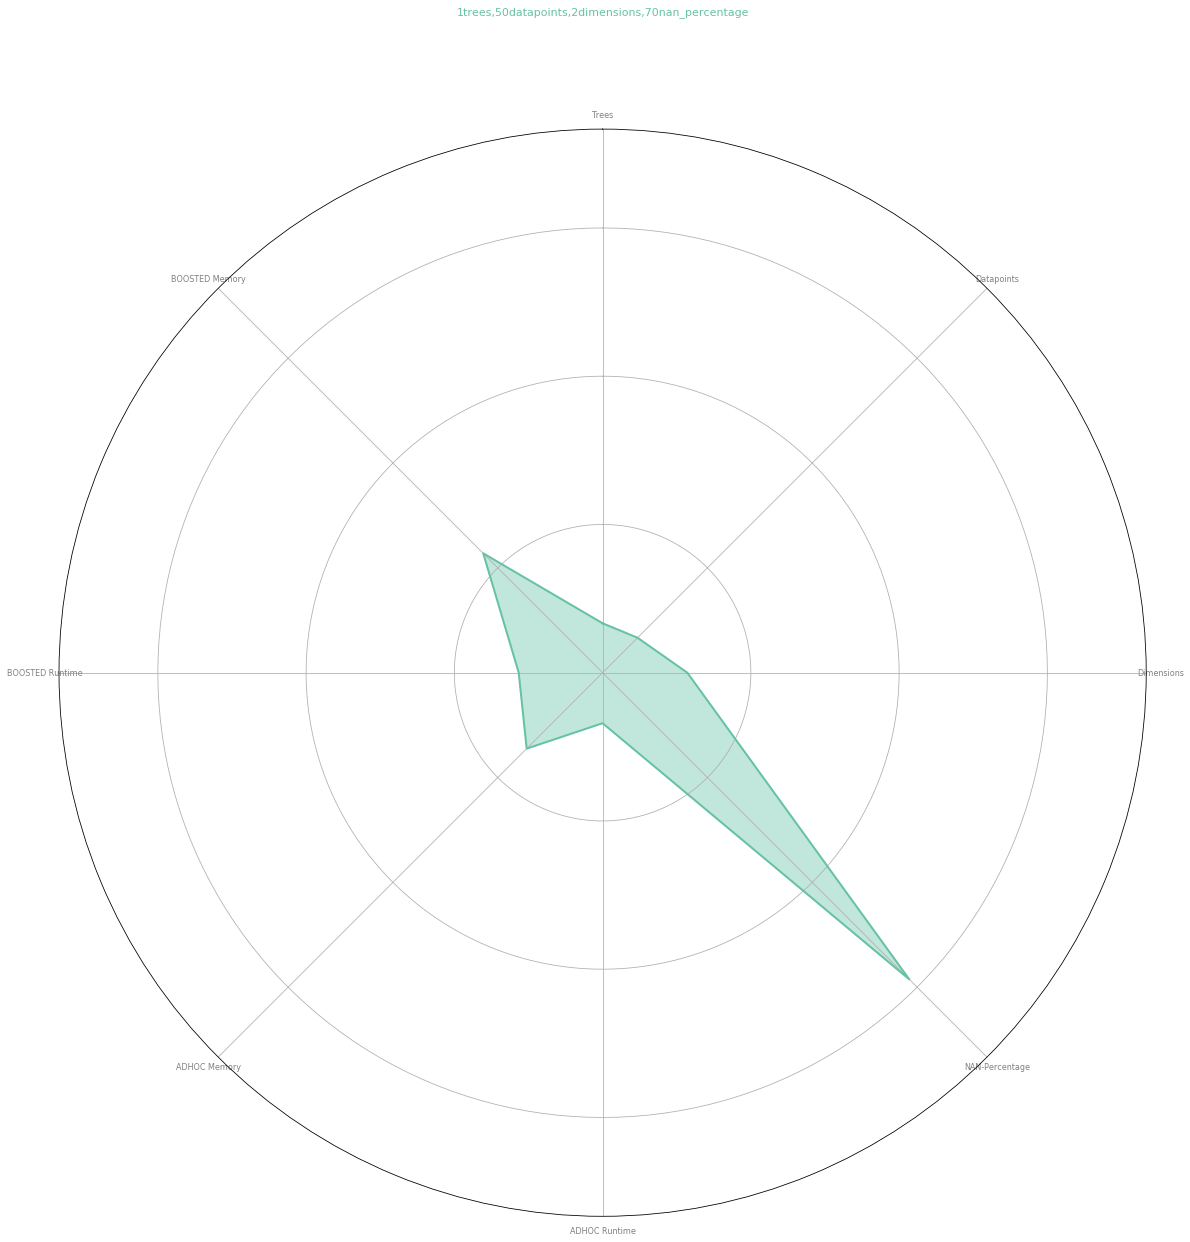

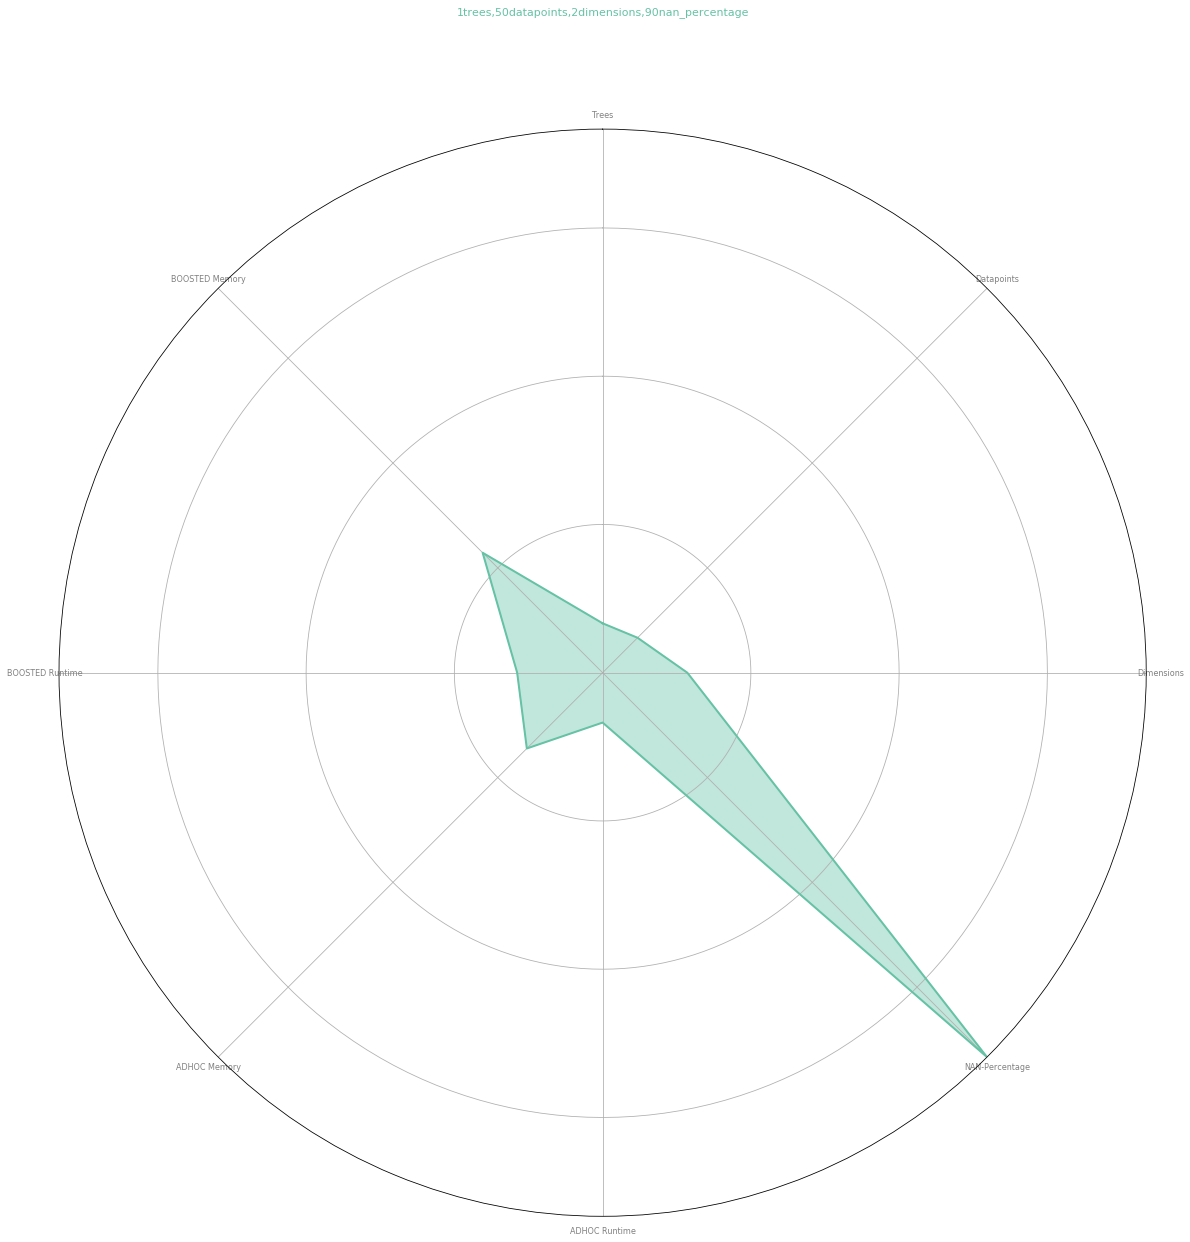

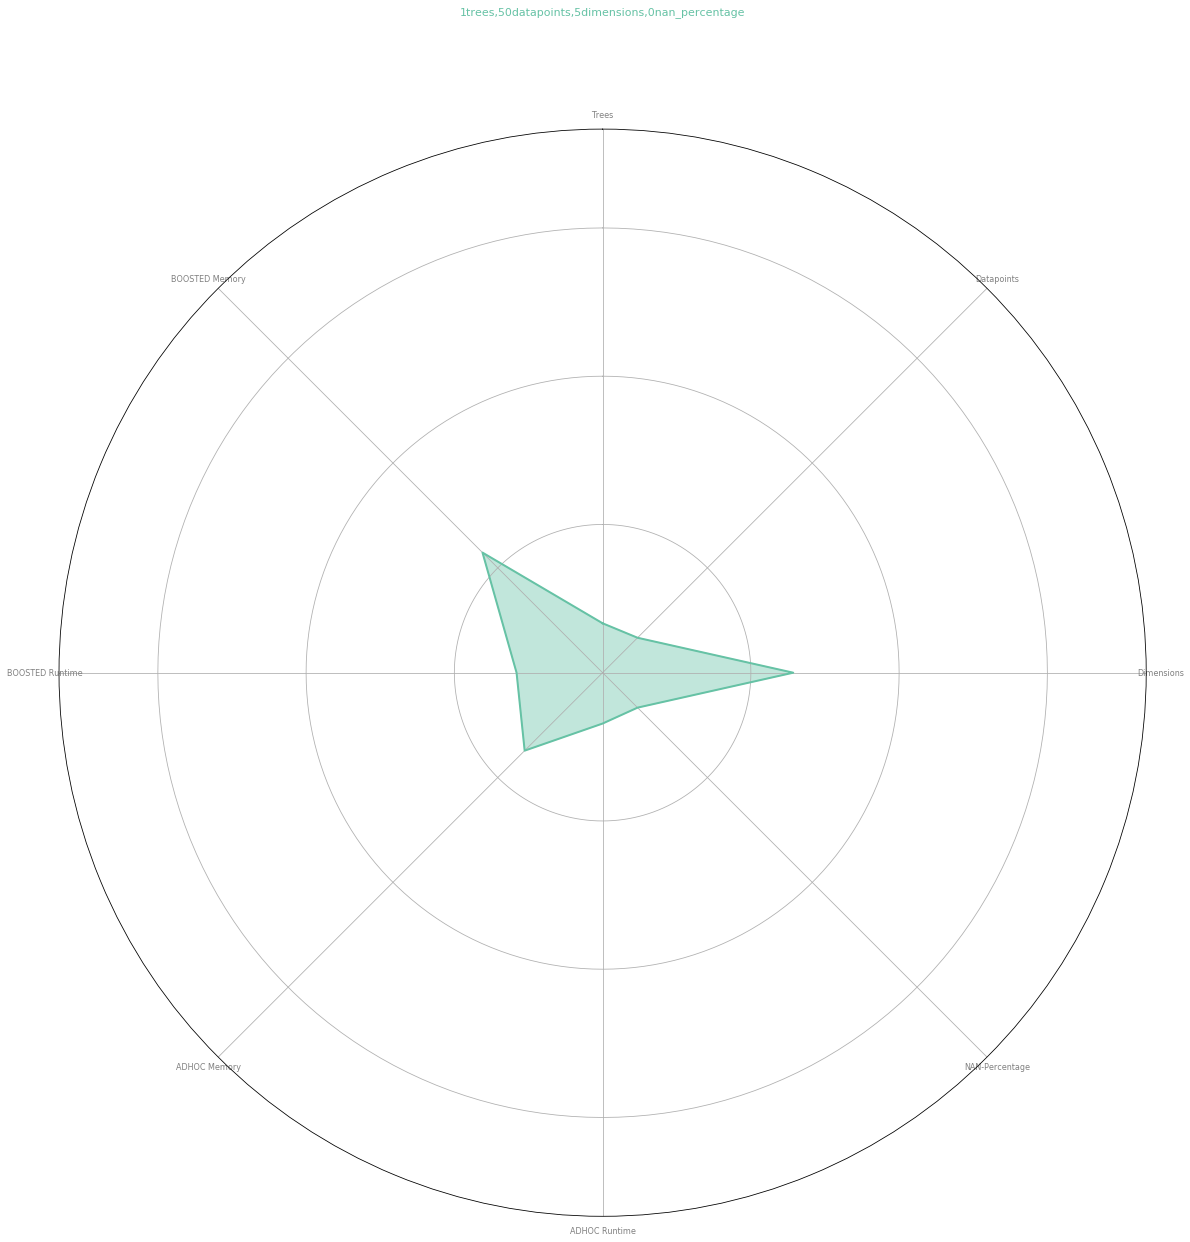

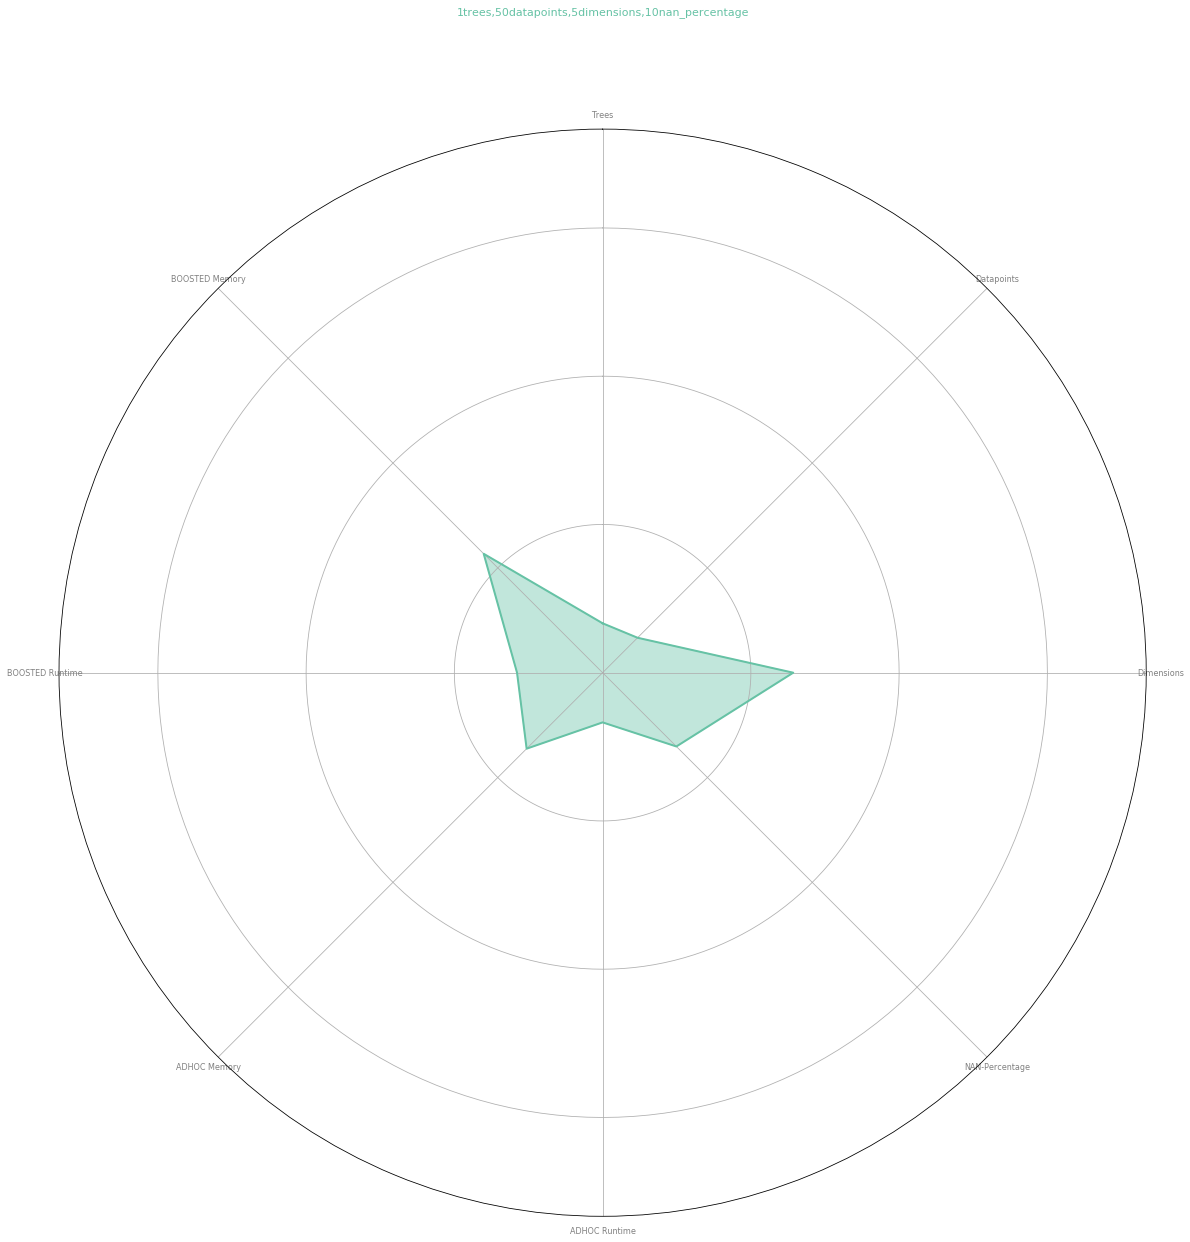

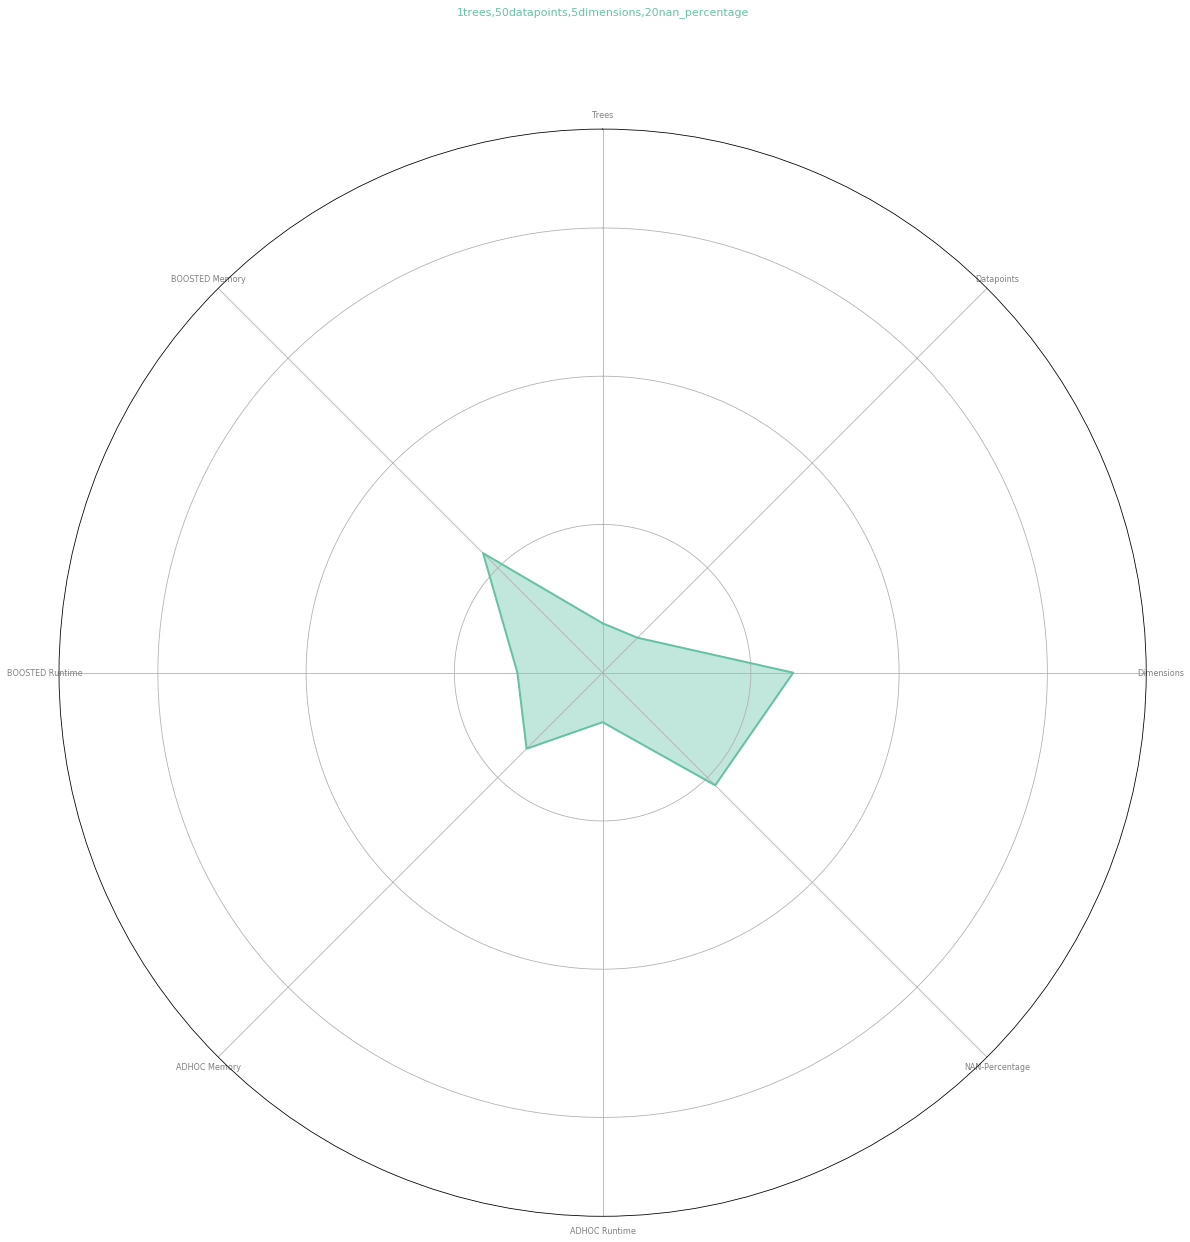

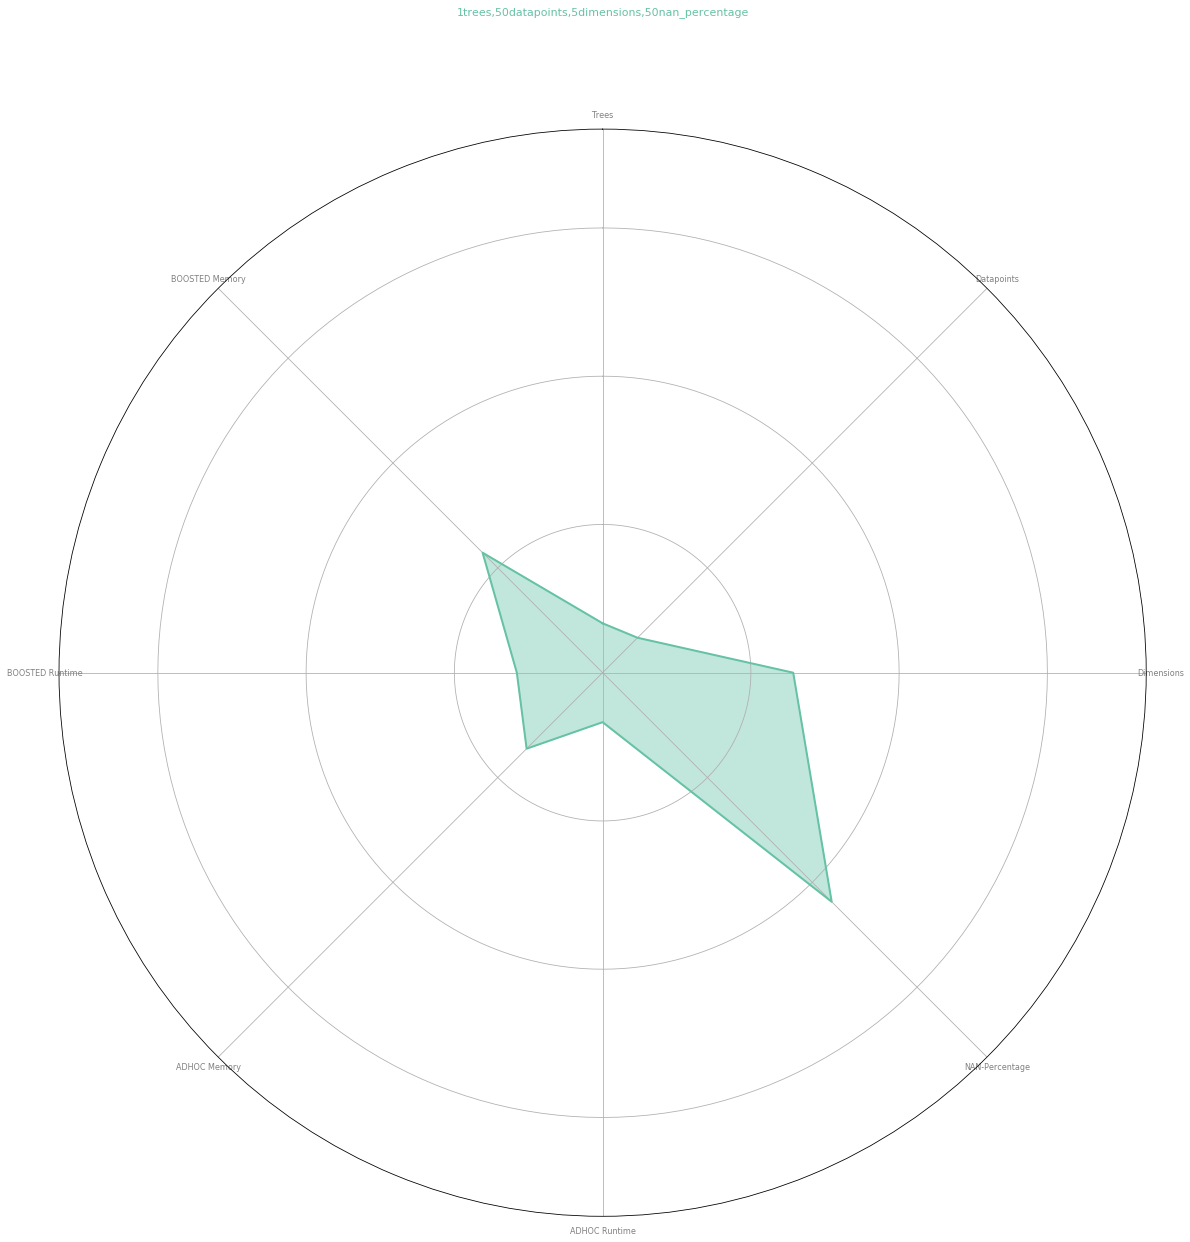

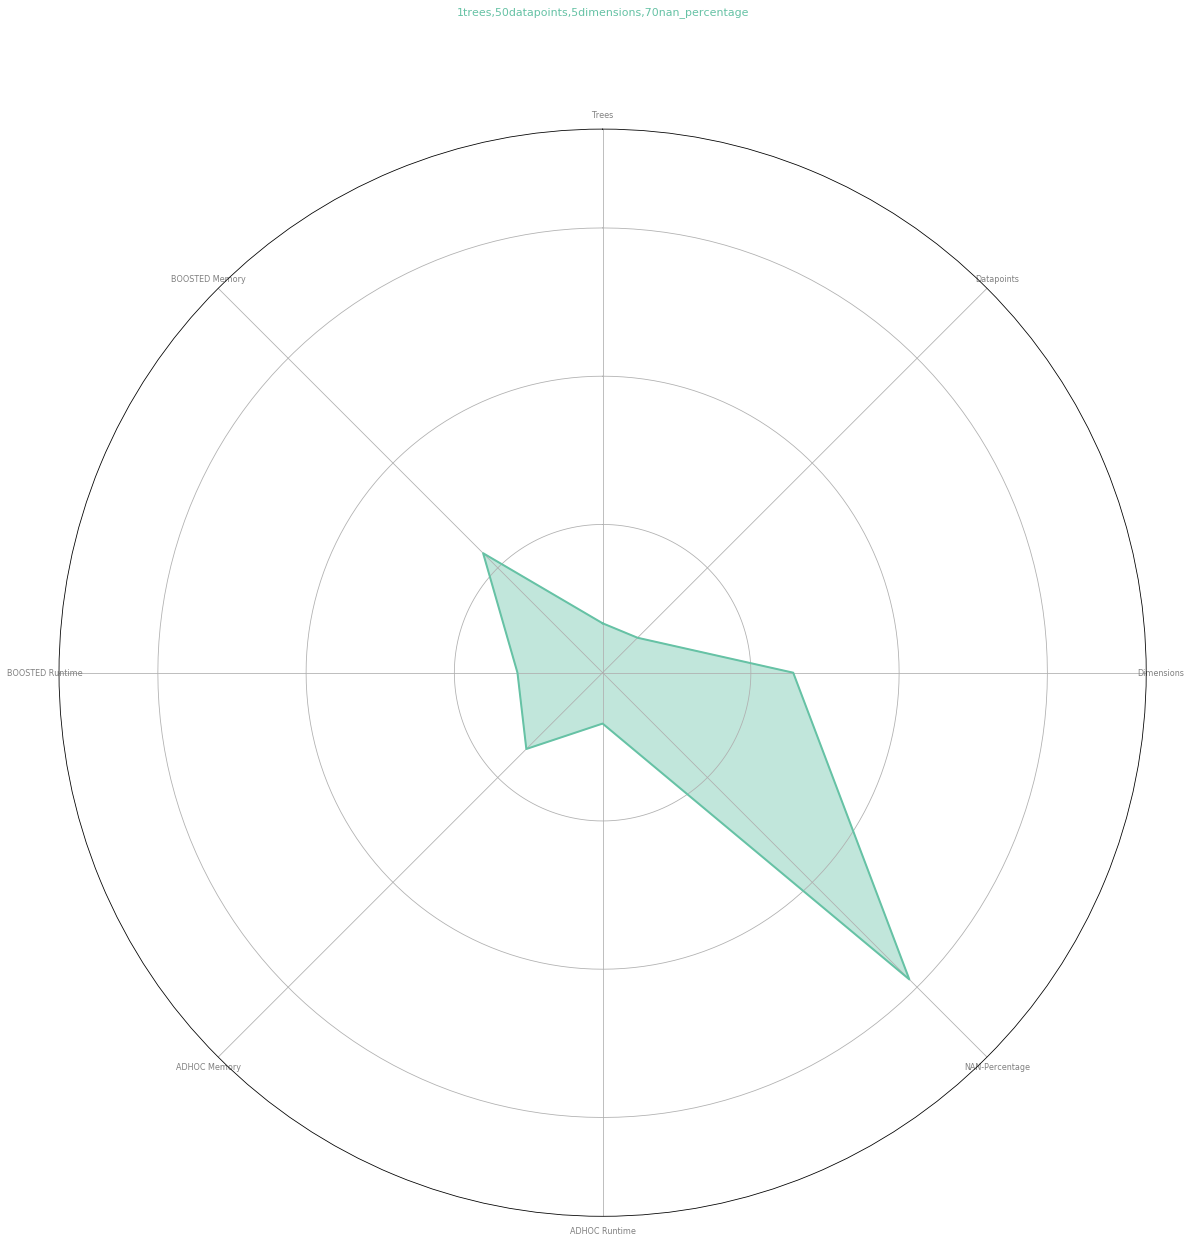

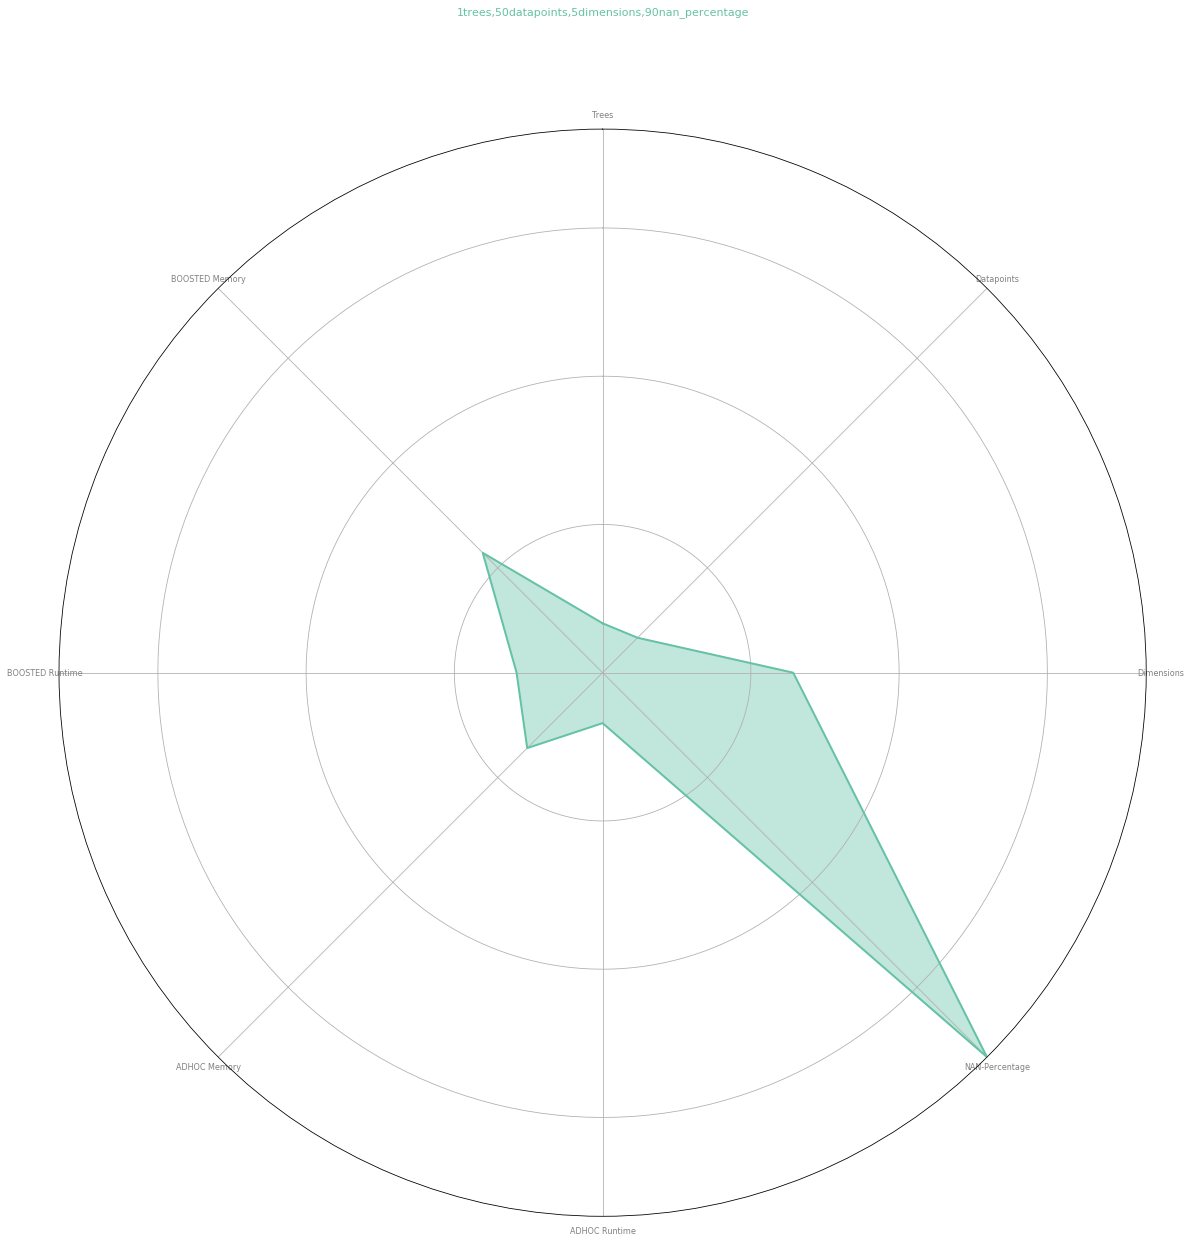

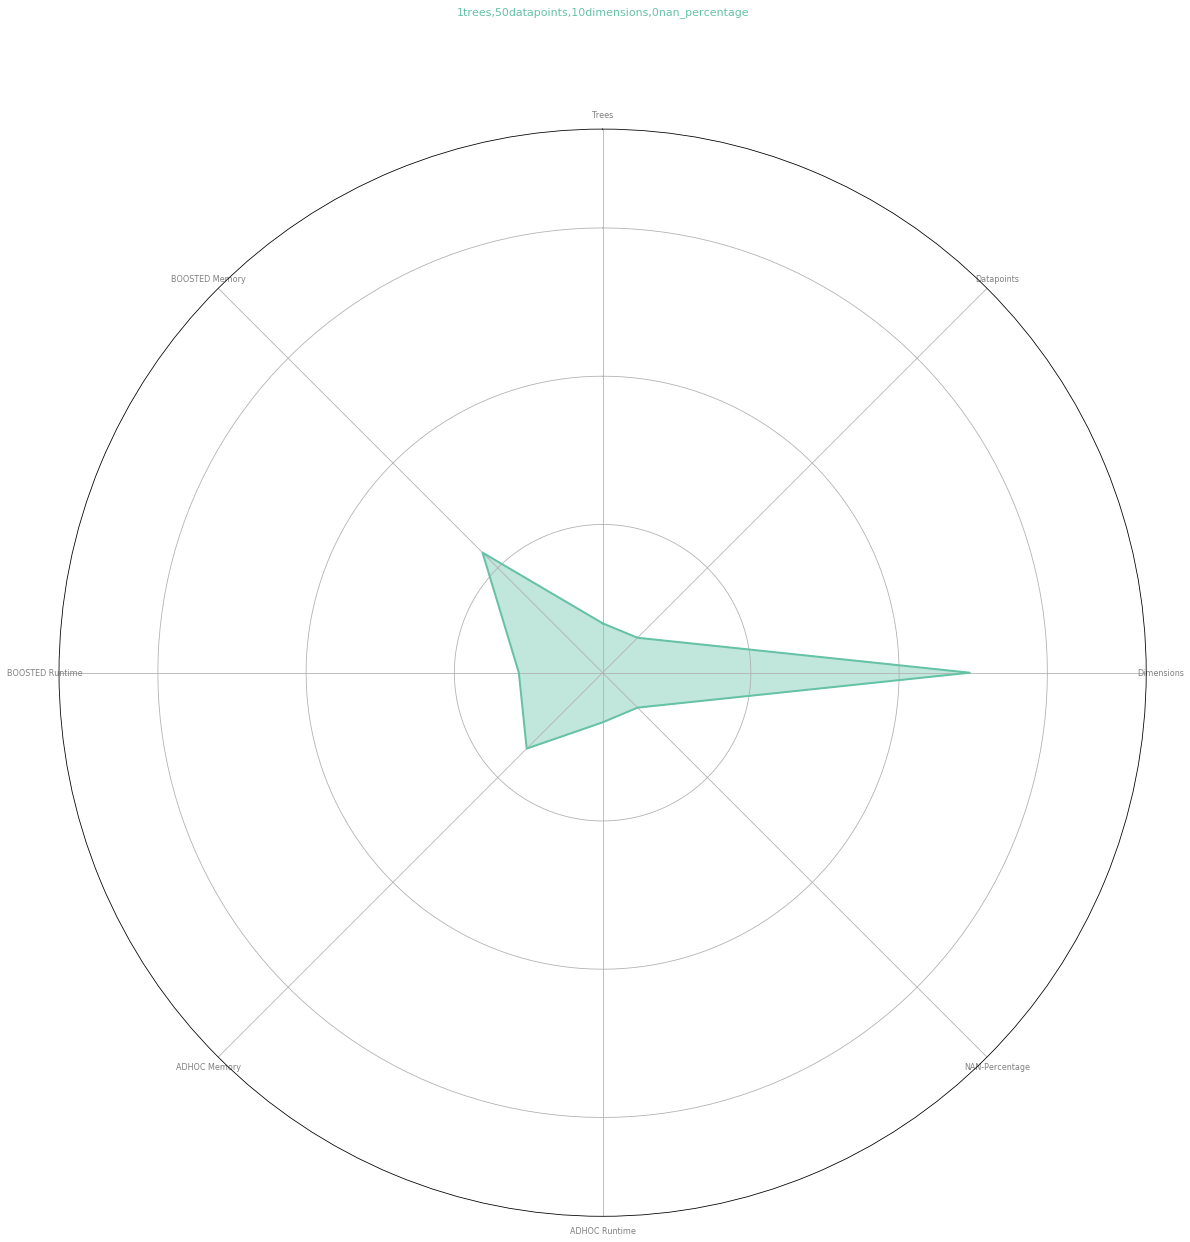

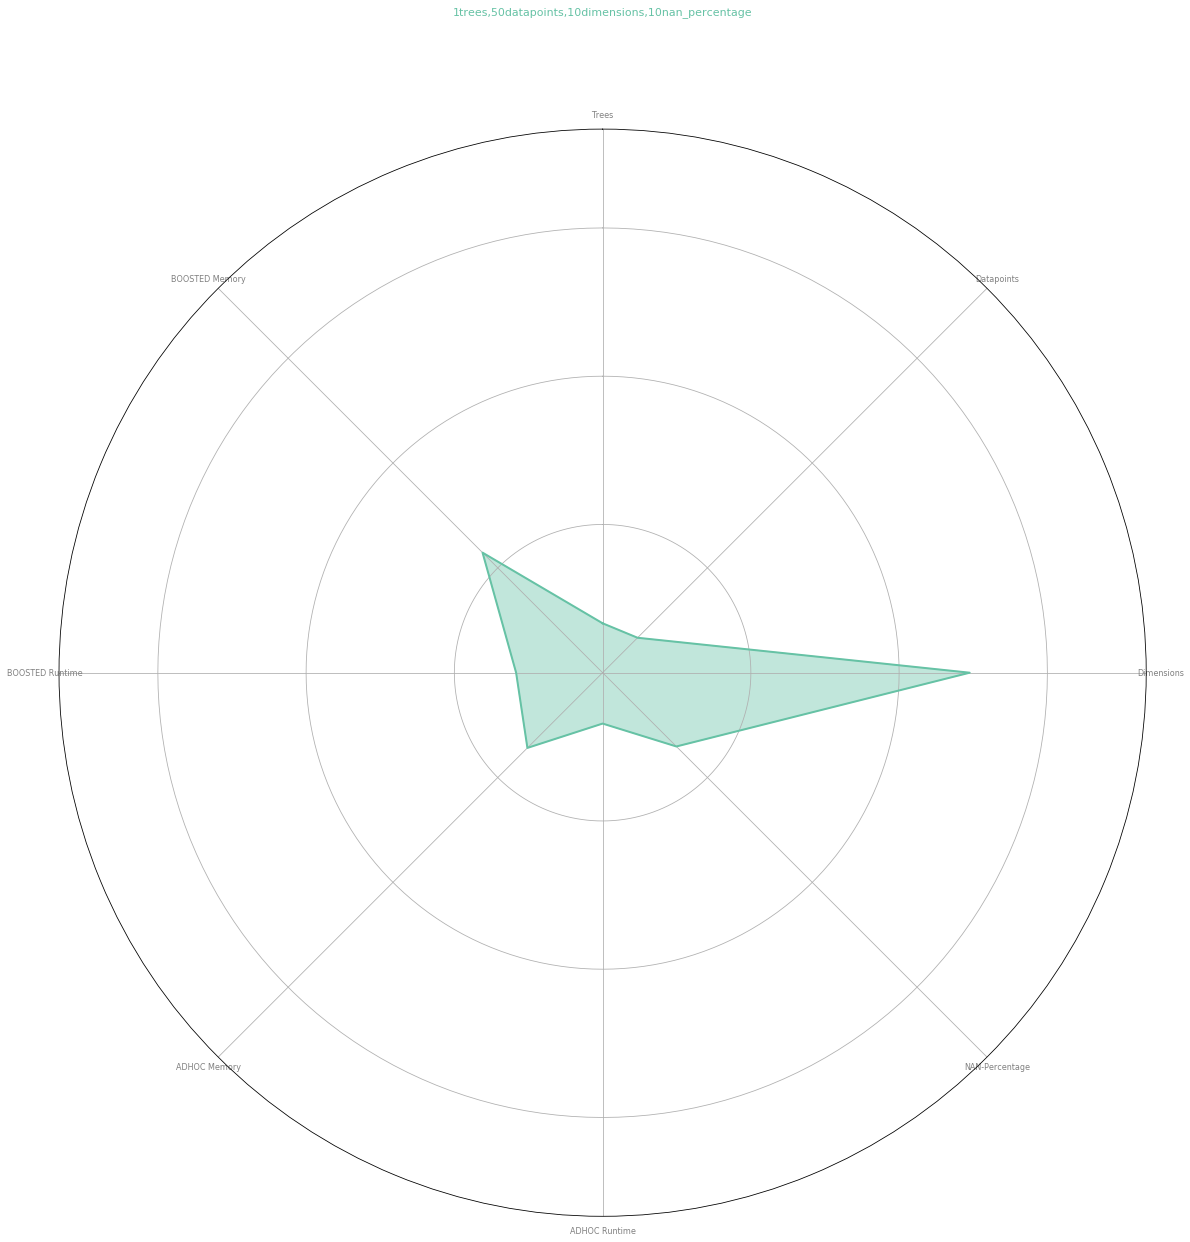

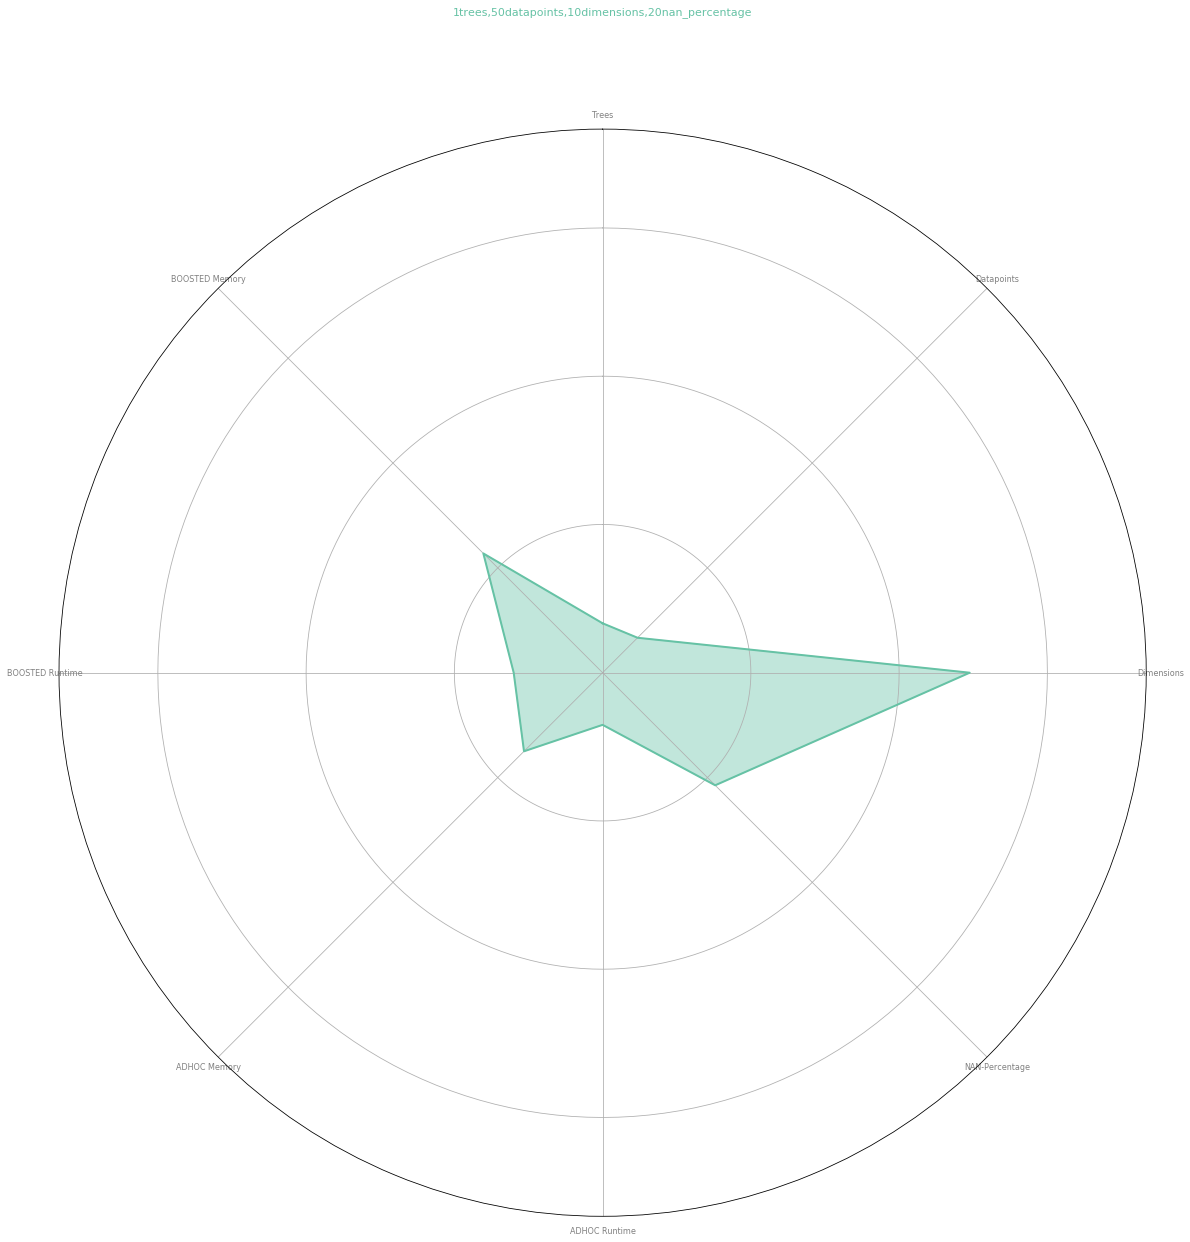

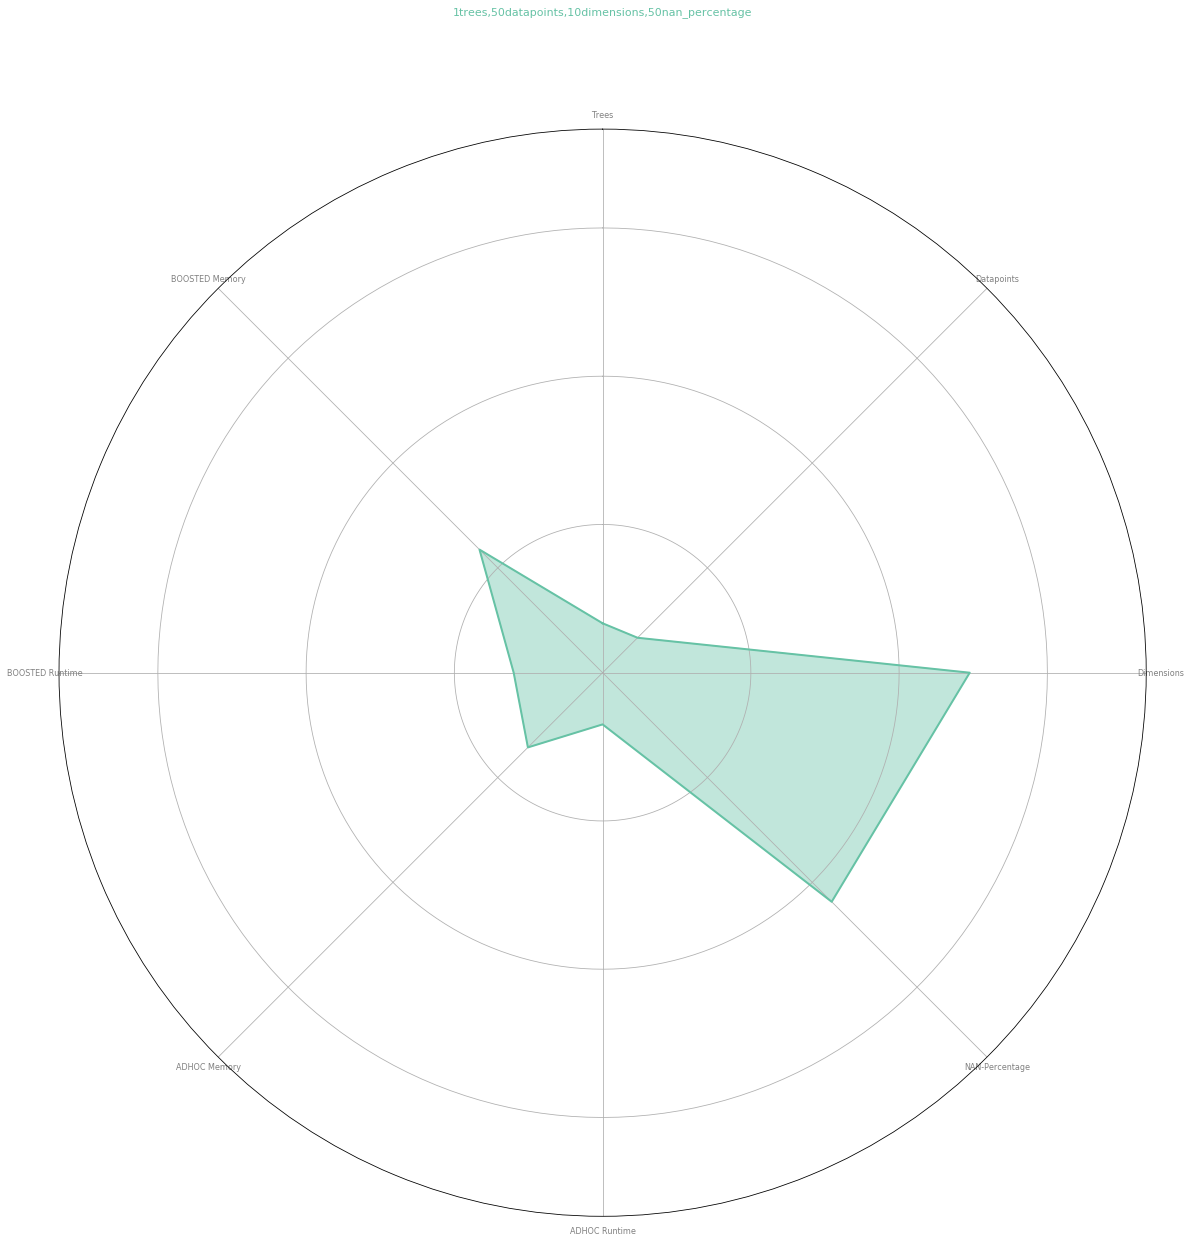

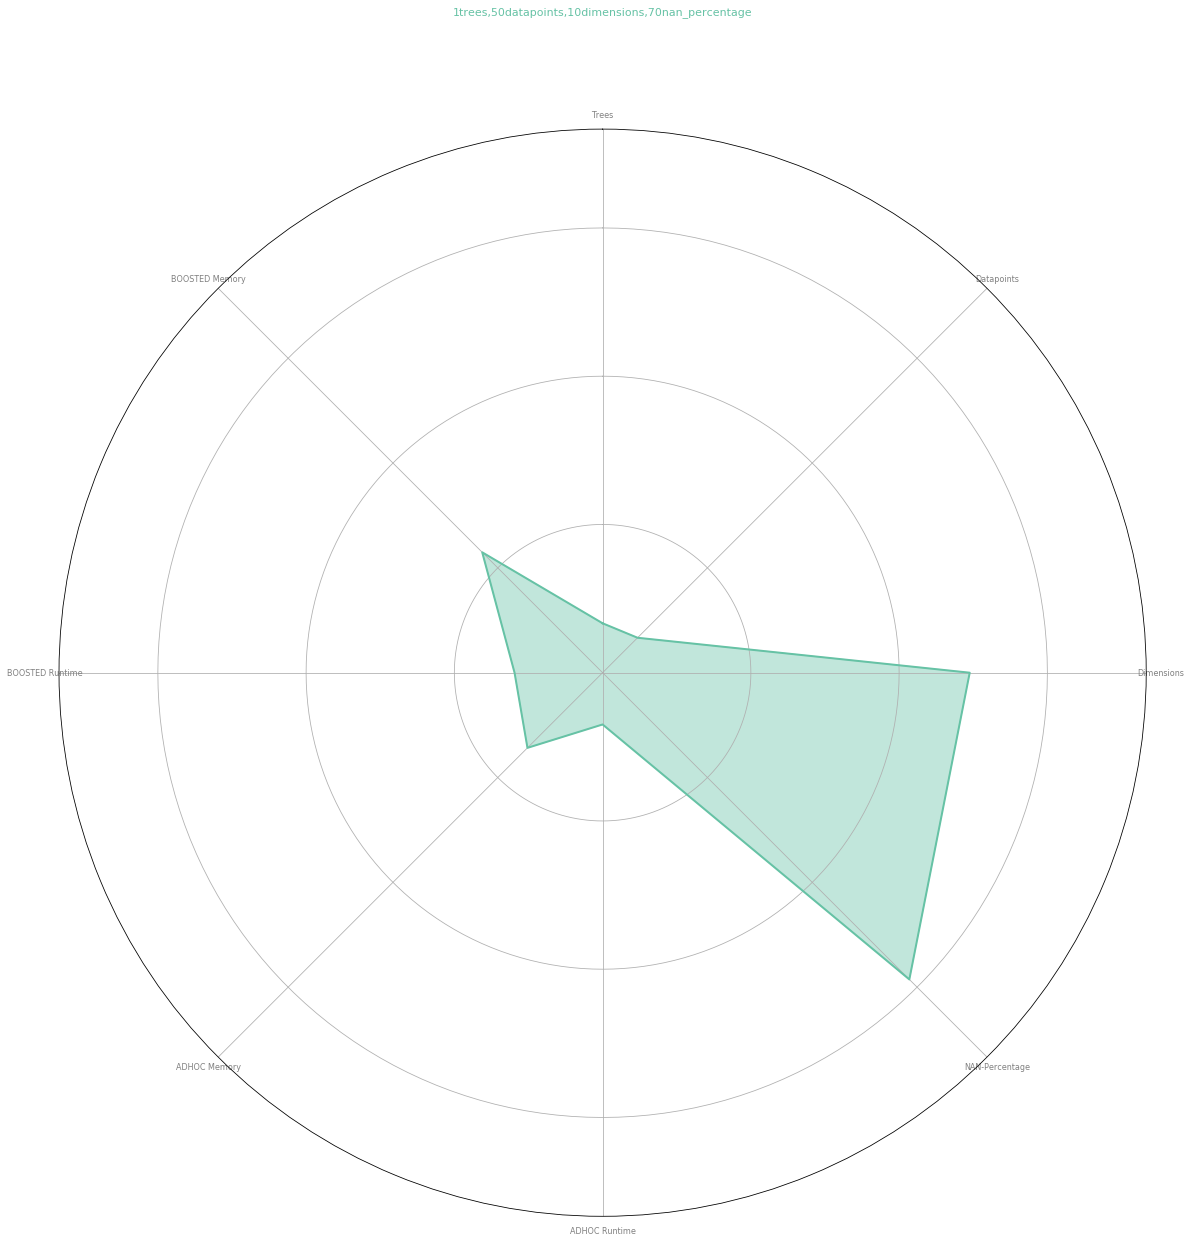

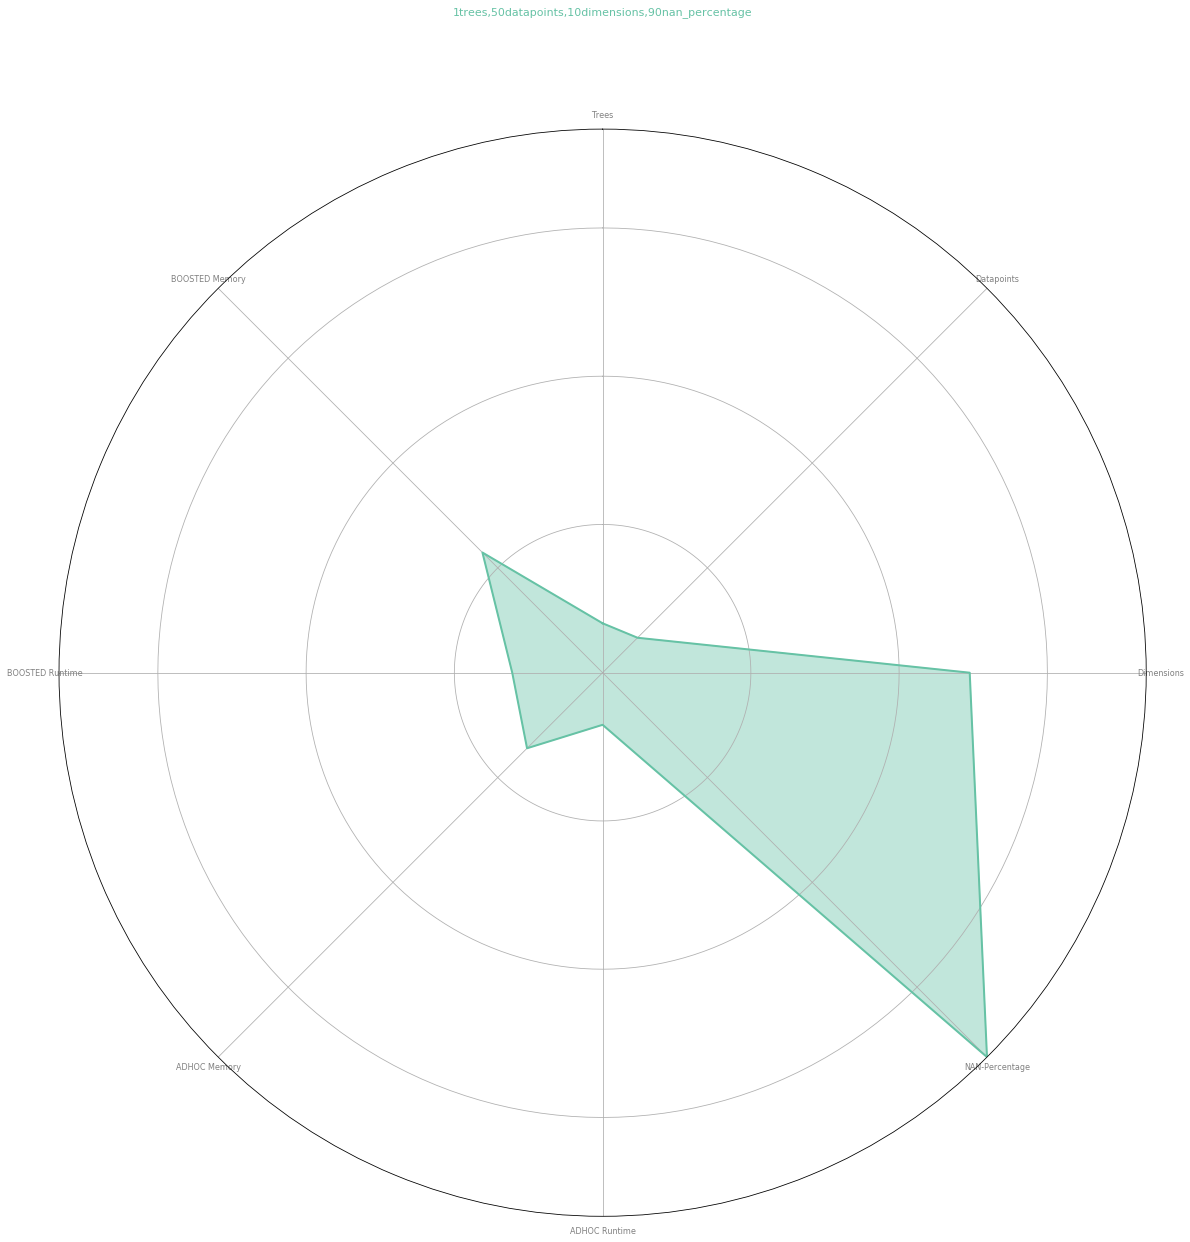

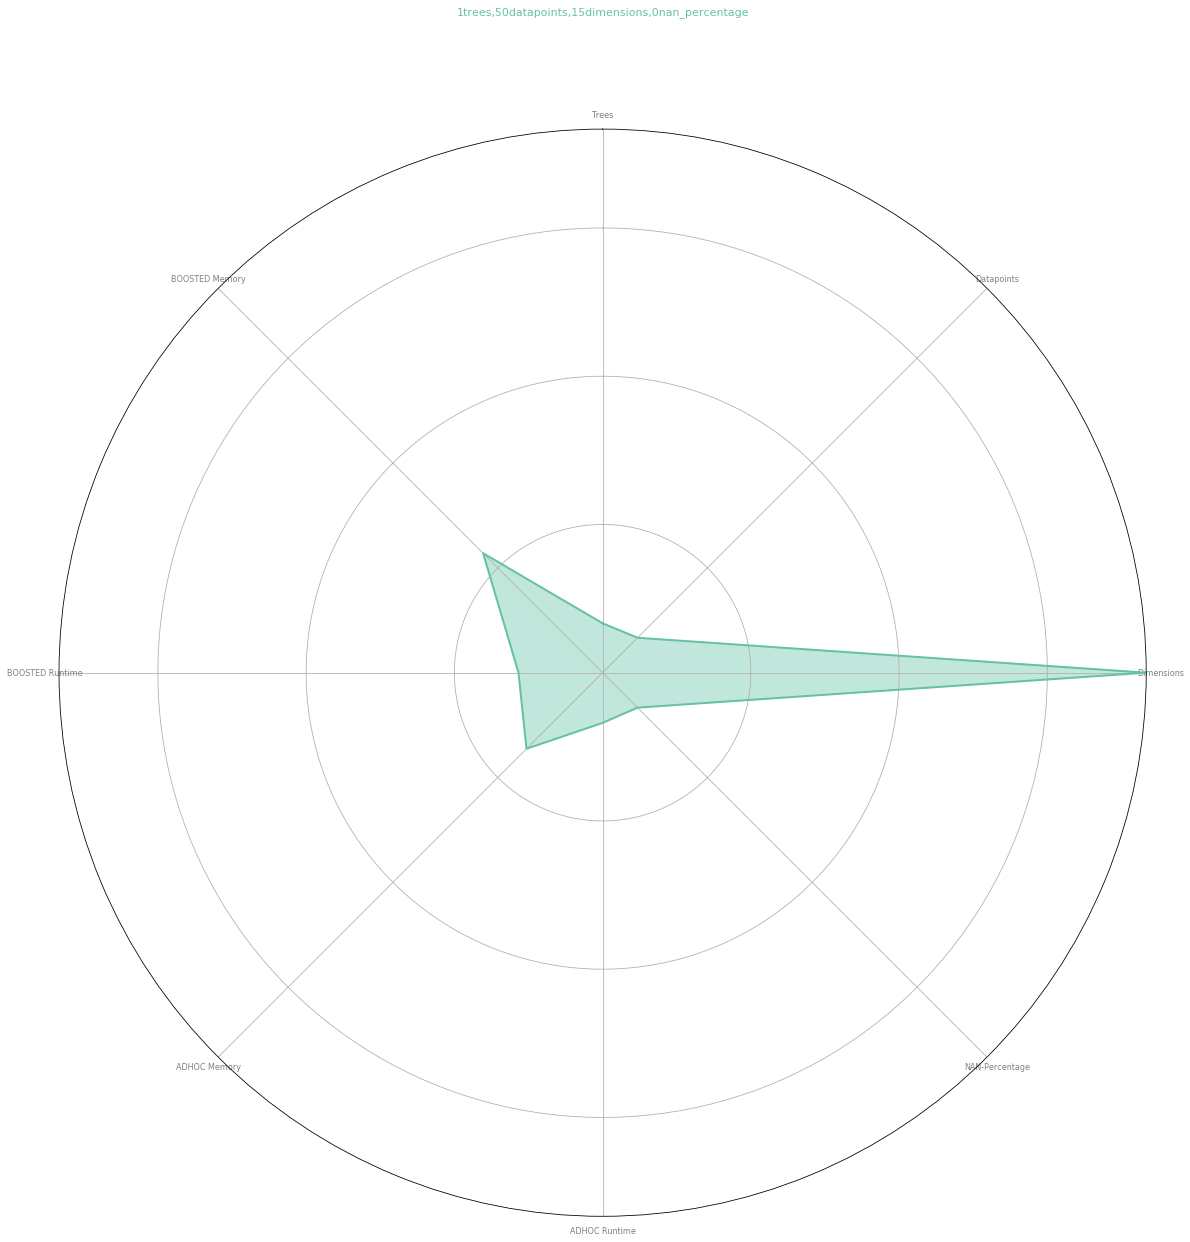

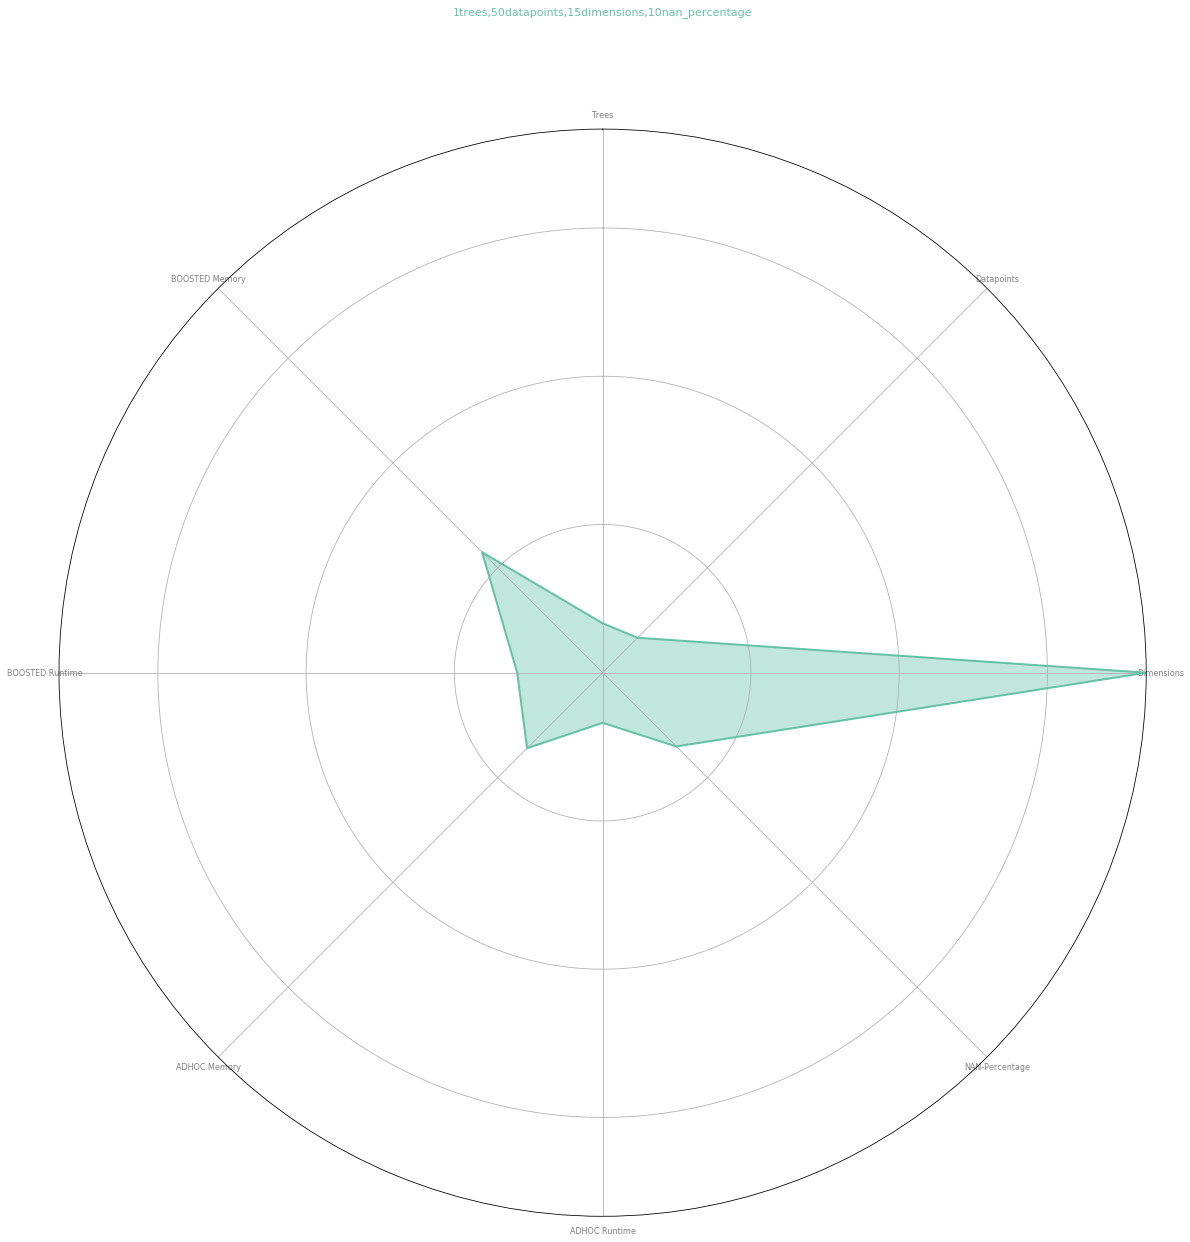

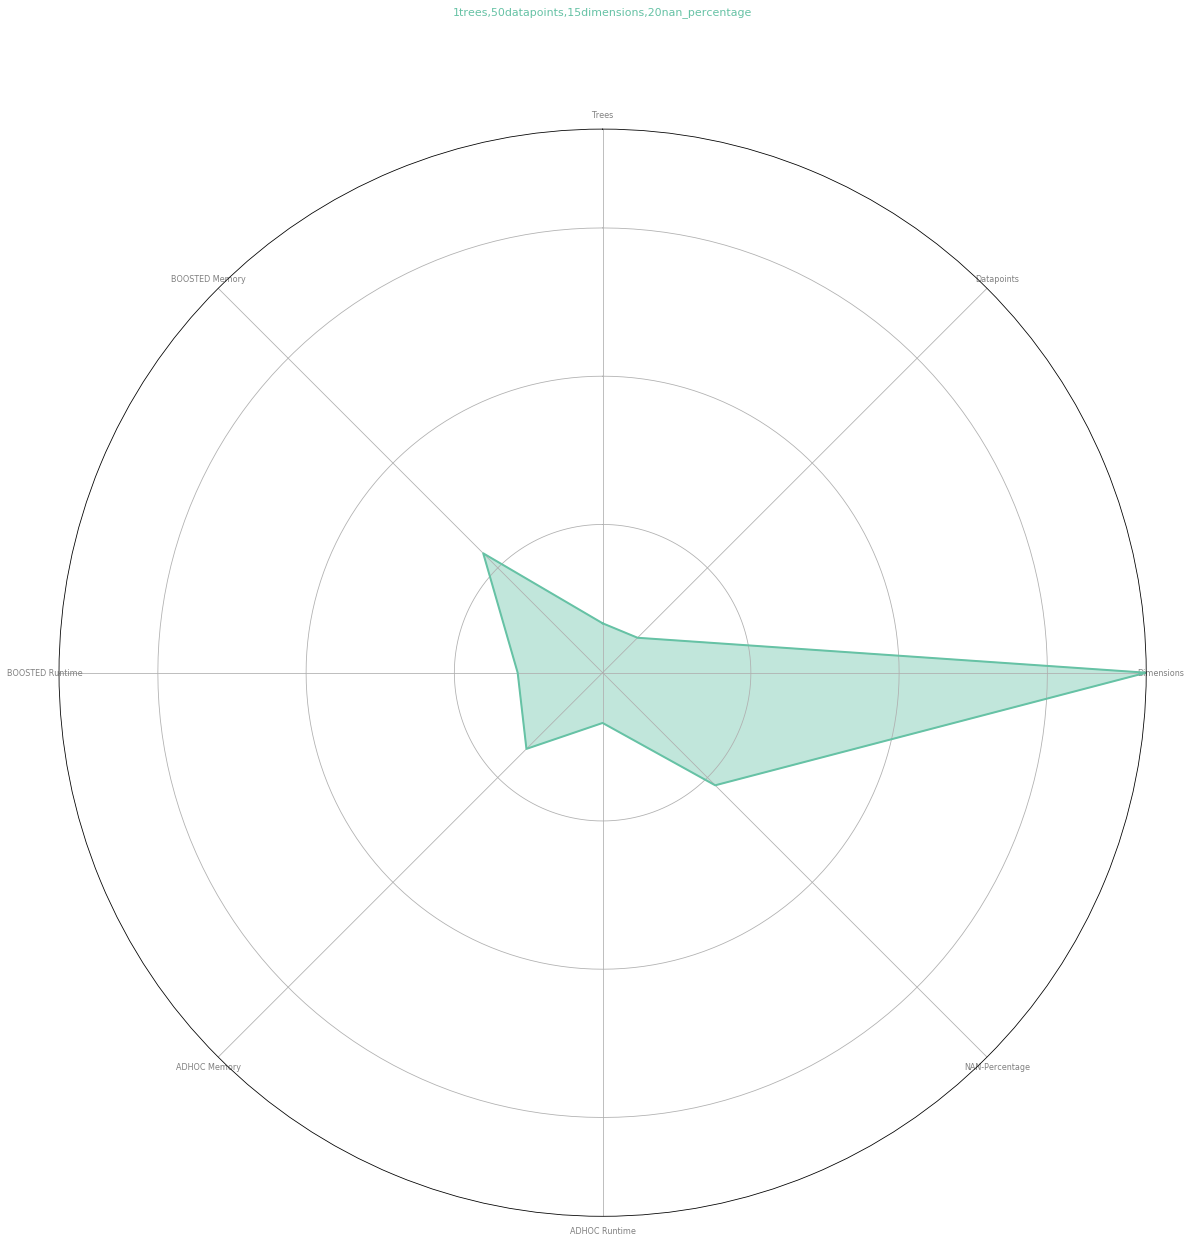

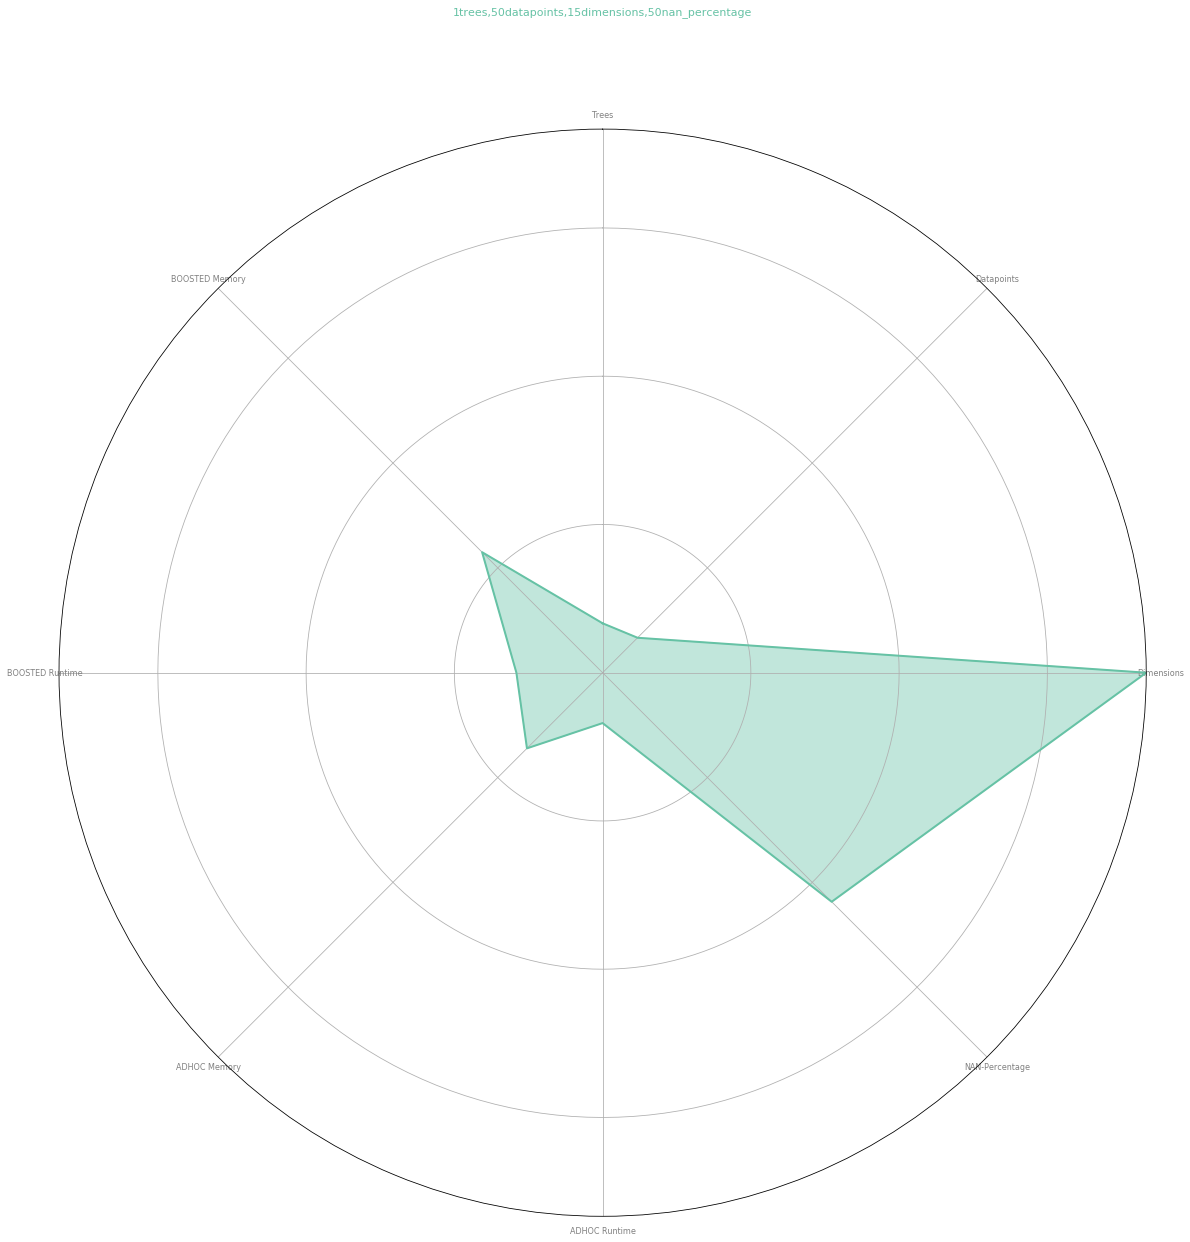

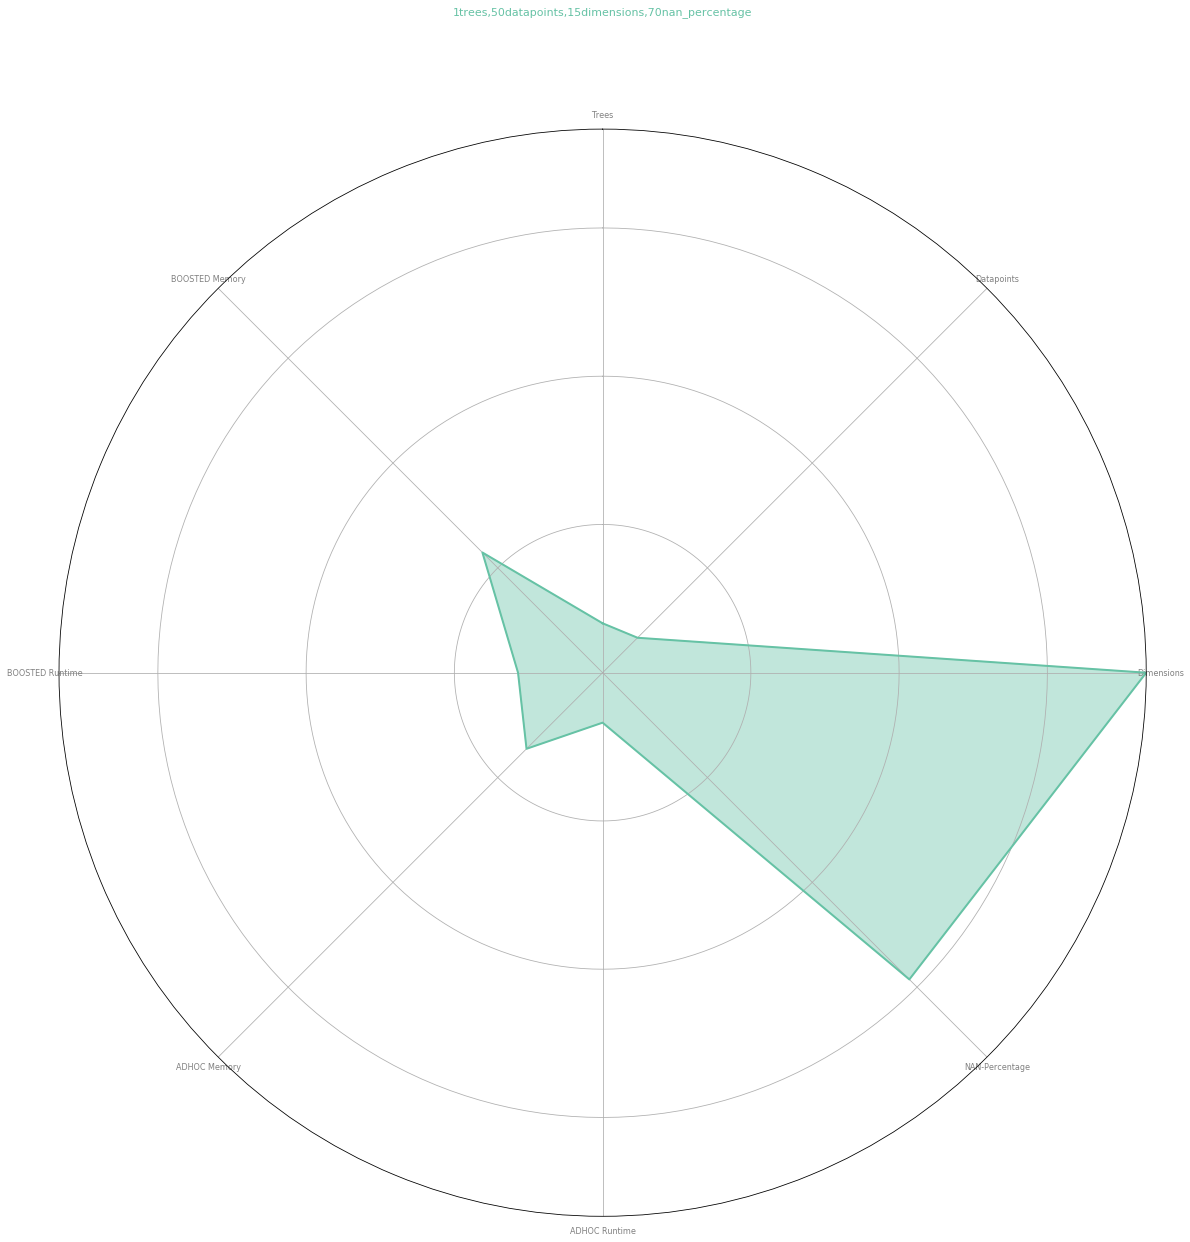

In [ ]:
from math import pi
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( split,row, title, color):
    plt.figure(figsize=(20,20))
    # number of variable
    categories=list(split)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1,1,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=24)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.3,0.6,0.9], [" "," "," "], color="grey", size=7)
    plt.ylim(0,1.1)

    # Ind1
    values=split.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    plt.savefig(title)
    plt.show()
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
#plt.figure(figsize=(10, 80))

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
splits=np.array_split(df,len(df.index))
for split in splits:
    split=split.reset_index(drop=True)
    for row in range(0, len(split.index)):
        make_spider( split=split,row=row, title=''+split['group'][row], color=my_palette(row))


In [ ]:
with open("./results_n17.p","rb") as file:
    results_n17=pickle.load(file)
with open("./results_hearthstone.p","rb") as file:
    results_hearthstone=pickle.load(file)
with open("./results_artificial.p","rb") as file:
    results_artificial=pickle.load(file)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
np.sum(results_n17[0][4],axis=0)

In [ ]:
results_n17[0][4][0]

In [ ]:
for i in range(len(["ADHOC","BOOSTED","IMPUTED"])):
    plt.figure()
    plot_confusion_matrix(np.sum(results_n17[i][4],axis=0),classes=["N17","OTHER"],normalize=True,title=["ADHOC","BOOSTED","IMPUTED"][i])
    plt.show()    
    plt.savefig(["ADHOC","BOOSTED","IMPUTED"][i]+"_N17_cfmatrix.png")

In [ ]:
for i in range(len(["ADHOC","BOOSTED","IMPUTED"])):
    plt.figure()
    plot_confusion_matrix(np.sum(results_artificial[i][4],axis=0),classes=["A","B","C"],normalize=True,title=["ADHOC","BOOSTED","IMPUTED"][i])
    plt.show()
    plt.savefig(["ADHOC","BOOSTED","IMPUTED"][i]+"_function_cfmatrix.png")

In [ ]:
for i in range(len(["ADHOC","BOOSTED","IMPUTED"])):
    plt.figure()
    plot_confusion_matrix(np.sum(results_hearthstone[i][4],axis=0),classes=["SPELL","MINION","ENCHANTMENT","HERO","HERO_POWER","WEAPON"],normalize=True,title=["ADHOC","BOOSTED","IMPUTED"][i])
    plt.show()
    plt.savefig(["ADHOC","BOOSTED","IMPUTED"][i]+"_hearthstone_cfmatrix.png")